# CIC-IDS-2017 DataSet Preparation

## 1.inroduction sur la dataset CIC-IDS-2017

- Le dataset CIC-IDS2017 est un ensemble de données de trafic réseau conçu pour l'évaluation des systèmes de détection d'intrusion. Il contient plus de 2.8 millions de paquets répartis entre un trafic normal et sept types d'attaques. Ce dataset est fortement déséquilibré, avec une majorité de trafic benin.

- L'analyse exploratoire a révélé des doublons et quelques valeurs manquantes/infinies, qui ont été traitées en conséquence. Étant donné la grande dimension du dataset, une réduction de mémoire et une réduction de dimensions (PCA) ont été appliquées pour optimiser l'entraînement des modèles.

## 2.Caractéristiques du Dataset et Analyse Exploratoire

### 2.1 Charger, visualiser les données et afficher l'analyse sur les lignes et les colonnes

In [ ]:
from google.colab import drive # chagrer mon drive dans le google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # utilis pour les operations mathematiques et la manipulation de tableaux
import pandas as pd # utilise pour le traitement et lanalyse des donnes dans les tableau
import seaborn as sns # bibliotheque de visualisation basee sur Matplotlib
sns.set(style='darkgrid') #configuree seaborn avec un style darkgrid
import missingno as msno # utilise pour visualiser les valeurs manquantes dans  dataset
import matplotlib.pyplot as plt #bibliotheque principale pour tracer des graphiques.

In [ ]:
# chageament des differents data files aprtir du google drive
data1 = pd.read_csv('/content/drive/MyDrive/datasets/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('/content/drive/MyDrive/datasets/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv('/content/drive/MyDrive/datasets/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv('/content/drive/MyDrive/datasets/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv('/content/drive/MyDrive/datasets/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('/content/drive/MyDrive/datasets/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv('/content/drive/MyDrive/datasets/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv('/content/drive/MyDrive/datasets/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [ ]:
# une visualisation des dimensions de chauque dataset
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [ ]:
data = pd.concat(data_list) # concatination des 8 differents data
rows, cols = data.shape # retourne un tuple

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [ ]:
# suppresion des 8 data separe apres la concatination de ces derniers
for d in data_list: del d

In [ ]:
# supprission des espaces au debut et a la fin des noms de colonnes
col_names = {col: col.strip() for col in data.columns} # dictionnaire de comprehension
data.rename(columns = col_names, inplace = True)

In [ ]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [ ]:
pd.options.display.max_rows = 80

print('Apercu des colonnes:')
data.describe().transpose()

Apercu des colonnes:


count          mean           std  \
Destination Port             2830743.0  8.071483e+03  1.828363e+04   
Flow Duration                2830743.0  1.478566e+07  3.365374e+07   
Total Fwd Packets            2830743.0  9.361160e+00  7.496728e+02   
Total Backward Packets       2830743.0  1.039377e+01  9.973883e+02   
Total Length of Fwd Packets  2830743.0  5.493024e+02  9.993589e+03   
Total Length of Bwd Packets  2830743.0  1.616264e+04  2.263088e+06   
Fwd Packet Length Max        2830743.0  2.075999e+02  7.171848e+02   
Fwd Packet Length Min        2830743.0  1.871366e+01  6.033935e+01   
Fwd Packet Length Mean       2830743.0  5.820194e+01  1.860912e+02   
Fwd Packet Length Std        2830743.0  6.891013e+01  2.811871e+02   
Bwd Packet Length Max        2830743.0  8.708495e+02  1.946367e+03   
Bwd Packet Length Min        2830743.0  4.104958e+01  6.886260e+01   
Bwd Packet Length Mean       2830743.0  3.059493e+02  6.052568e+02   
Bwd Packet Length Std        2830743.0  3.353257e+02  8.396932e+02   
Flow Bytes/s                 2829385.0           inf           NaN   
Flow Packets/s               2830743.0           inf           NaN   
Flow IAT Mean                2830743.0  1.298449e+06  4.507944e+06   
Flow IAT Std                 2830743.0  2.919271e+06  8.045870e+06   
Flow IAT Max                 2830743.0  9.182475e+06  2.445954e+07   
Flow IAT Min                 2830743.0  1.623796e+05  2.950282e+06   
Fwd IAT Total                2830743.0  1.448296e+07  3.357581e+07   
Fwd IAT Mean                 2830743.0  2.610193e+06  9.525722e+06   
Fwd IAT Std                  2830743.0  3.266957e+06  9.639055e+06   
Fwd IAT Max                  2830743.0  9.042939e+06  2.452916e+07   
Fwd IAT Min                  2830743.0  1.021893e+06  8.591436e+06   
Bwd IAT Total                2830743.0  9.893830e+06  2.873661e+07   
Bwd IAT Mean                 2830743.0  1.805784e+06  8.887197e+06   
Bwd IAT Std                  2830743.0  1.485973e+06  6.278469e+06   
Bwd IAT Max                  2830743.0  4.684692e+06  1.716095e+07   
Bwd IAT Min                  2830743.0  9.672614e+05  8.308983e+06   
Fwd PSH Flags                2830743.0  4.644646e-02  2.104500e-01   
Bwd PSH Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2830743.0  1.112782e-04  1.054826e-02   
Bwd URG Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2830743.0 -2.599739e+04  2.105286e+07   
Bwd Header Length            2830743.0 -2.273275e+03  1.452209e+06   
Fwd Packets/s                2830743.0  6.386535e+04  2.475371e+05   
Bwd Packets/s                2830743.0  6.995192e+03  3.815170e+04   
Min Packet Length            2830743.0  1.643450e+01  2.523772e+01   
Max Packet Length            2830743.0  9.504024e+02  2.028229e+03   
Packet Length Mean           2830743.0  1.719444e+02  3.054915e+02   
Packet Length Std            2830743.0  2.949756e+02  6.318001e+02   
Packet Length Variance       2830743.0  4.861548e+05  1.647490e+06   
FIN Flag Count               2830743.0  3.537976e-02  1.847378e-01   
SYN Flag Count               2830743.0  4.644646e-02  2.104500e-01   
RST Flag Count               2830743.0  2.423392e-04  1.556536e-02   
PSH Flag Count               2830743.0  2.980705e-01  4.574107e-01   
ACK Flag Count               2830743.0  3.158443e-01  4.648513e-01   
URG Flag Count               2830743.0  9.482316e-02  2.929706e-01   
CWE Flag Count               2830743.0  1.112782e-04  1.054826e-02   
ECE Flag Count               2830743.0  2.433990e-04  1.559935e-02   
Down/Up Ratio                2830743.0  6.835004e-01  6.804920e-01   
Average Packet Size          2830743.0  1.919837e+02  3.318603e+02   
Avg Fwd Segment Size         2830743.0  5.820194e+01  1.860912e+02   
Avg Bwd Segment Size         2830743.0  3.059493e+02  6.052568e+02   
Fwd Header Length.1          2830743.0 -2.599739e+04  2.105286e+07   
Fwd Avg Bytes/Bulk           2830743.0  0.0

In [ ]:
pd.options.display.max_columns = 80 # pour la visualisation de tout les colonnes car cicids contient 79 colones def
data

Destination Port  Flow Duration  Total Fwd Packets  \
0                  49188              4                  2   
1                  49188              1                  2   
2                  49188              1                  2   
3                  49188              1                  2   
4                  49486              3                  2   
...                  ...            ...                ...   
225740             61374             61                  1   
225741             61378             72                  1   
225742             61375             75                  1   
225743             61323             48                  2   
225744             61326             68                  1   

        Total Backward Packets  Total Length of Fwd Packets  \
0                            0                           12   
1                            0                           12   
2                            0                           12   
3                            0                           12   
4                            0                           12   
...                        ...                          ...   
225740                       1                            6   
225741                       1                            6   
225742                       1                            6   
225743                       0                           12   
225744                       1                            6   

        Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                 0                      6   
1                                 0                      6   
2                                 0                      6   
3                                 0                      6   
4                                 0                      6   
...                             ...                    ...   
225740                            6                      6   
225741                            6                      6   
225742                            6                      6   
225743                            0                      6   
225744                            6                      6   

        Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           6                     6.0                    0.0   
1                           6                     6.0                    0.0   
2                           6                     6.0                    0.0   
3                           6                     6.0                    0.0   
4                           6                     6.0                    0.0   
...                       ...                     ...                    ...   
225740                      6                     6.0                    0.0   
225741                      6                     6.0                    0.0   
225742                      6                     6.0                    0.0   
225743                      6                     6.0                    0.0   
225744                      6                     6.0                    0.0   

        Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                           0                      0                     0.0   
1                           0                      0                     0.0   
2                           0                      0                     0.0   
3                           0                      0                     0.0   
4                           0                      0                     0.0   
...                       ...                    ...                     ...   
225740                      6                      6                     6.0   
225741                      6                      6                     6.0   
225742                      6                      6                     6.0   


### 2.2 Data cleaning

#### Identifier les valeurs  doublees

In [ ]:
dups = data[data.duplicated()]
print(f'nombres de doublons: {len(dups)}')

NameError: name 'data' is not defined

data.drop_duplicates(inplace = True) # la suppression des doublons est effectuee directement dans le datafram existant ce qui signifie que la methode ne retourne rien et modifie lobjet data sur place
data.shape

#### Identifier les valeurs manquantes

In [ ]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0]) # affiche juste les valeurs manquante suoerieur a 0

Flow Bytes/s    353
dtype: int64


In [ ]:
# Verification des valeurs infinies
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [ ]:
# Remplacer toutes les valeurs infinies ( > 0 ou < 0) par NaN (pas un nombre)
print(f'Valeurs manquantes initiales: {data.isna().sum().sum()}') # 1er sum() pour calculer le nombre des nan dans chauqe colone et la 2eme sum() pour retourner le nombre totale

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Valeurs manquantes apres le traitement de valeurs infinies: {data.isna().sum().sum()}')

Valeurs manquantes initiales: 353
Valeurs manquantes apres le traitement de valeurs infinies: 3128


In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [ ]:
# Calcul du pourcentage de valeurs manquantes dans lensemble de donnees
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Valeurs manquantes', 1 : 'Pourcentage des valeurs totales'})

print(mis_table.loc[mis_per > 0])

                Valeurs manquantes  Pourcentage des valeurs totales
Flow Bytes/s                  1564                             0.06
Flow Packets/s                1564                             0.06


#### Visualisation des donnees manquantes

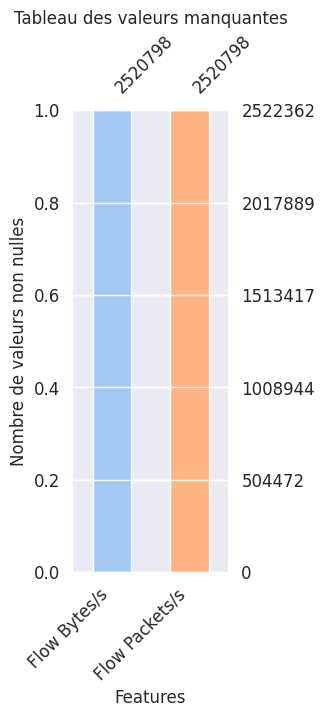

In [ ]:
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Nombre de valeurs non nulles', fontsize = 12)
ax.set_title('Tableau des valeurs manquantes', fontsize = 12)
plt.show()

#### Gestion des valeurs manquantes (colonnes avec donnees manquantes)

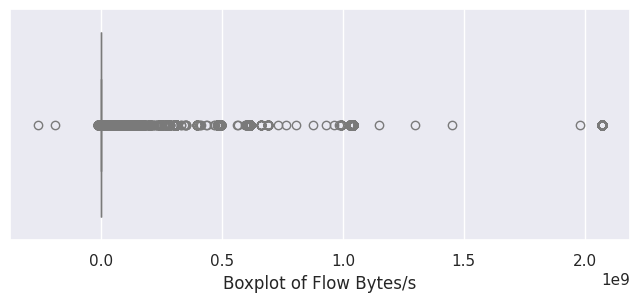

In [ ]:
plt.figure(figsize = (8, 3))
#sns.boxplot(x = data['Flow Bytes/s']) #Le boxplot est un graphique qui montre la distribution des donnees il permet de visualiser les quartiles (25%, 50%, 75%) ainsi que les valeurs aberrantes (outliers)
sns.boxplot(x = data.reset_index(drop=True)['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

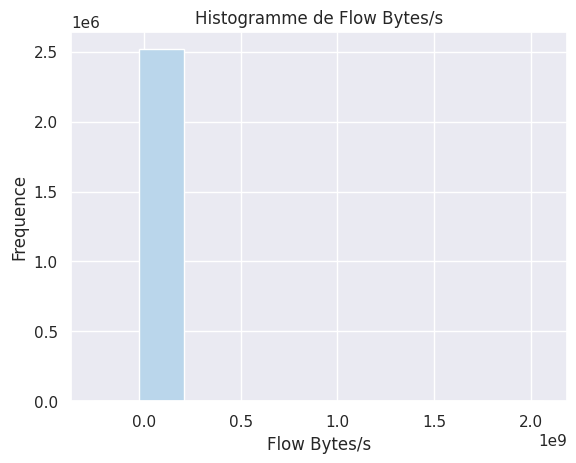

In [ ]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogramme de Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequence')
plt.show()

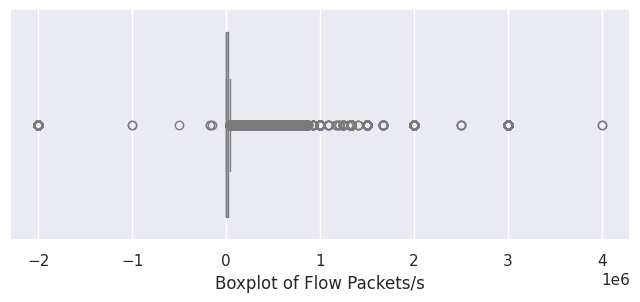

In [ ]:
plt.figure(figsize = (8, 3))
#sns.boxplot(x = data['Flow Packets/s'])
sns.boxplot(x = data.reset_index(drop=True)['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

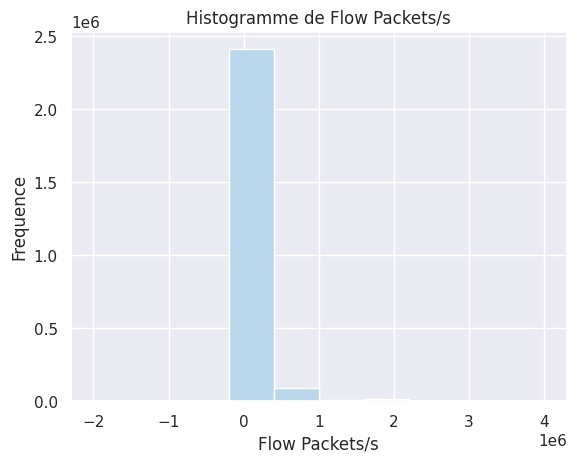

In [ ]:
plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogramme de Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequence')
plt.show()

In [ ]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Mediane de Flow Bytes/s: ', med_flow_bytes)
print('Mediane de Flow Packets/s: ', med_flow_packets)

Mediane de Flow Bytes/s:  3715.0378579999997
Mediane de Flow Packets/s:  69.742244285


In [ ]:
# Remplissage des valeurs manquantes avec la mediane
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

<ipython-input-27-7b1f4975e254>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
<ipython-input-27-7b1f4975e254>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
print('Nombre de \'Flow Bytes/s\' valeurs manquentes:', data['Flow Bytes/s'].isna().sum())
print('Nombre de \'Flow Packets/s\' valeurs manquentes:', data['Flow Packets/s'].isna().sum())

Nombre de 'Flow Bytes/s' valeurs manquentes: 0
Nombre de 'Flow Packets/s' valeurs manquentes: 0


- Dans un premier temps, nous avons identifié et supprimé les lignes dupliquées (**308 381 lignes**). Après avoir analysé la description du jeu de données, nous avons constaté la présence de **valeurs infinies**. Nous avons donc remplacé les valeurs infinies (positives et négatives) par **NaN**, les considérant comme des valeurs manquantes. Deux colonnes, **'Flow Bytes/s**' et **'Flow Packets/s'**, contiennent des valeurs manquantes, avec **1564 valeurs** manquantes pour chaque colonne, ce qui représente **0,06 %** du total des valeurs.

- Les variables 'Flow Bytes/s' et 'Flow Packets/s' sont continues et, d'après les histogrammes et les boxplots, nous avons observé que la majorité des valeurs se concentraient dans une plage spécifique, ce qui indique que les données ne suivent pas une distribution normale. Les boxplots montrent également la présence de valeurs extrêmes ou d'outliers. Par conséquent, nous avons choisi de remplir les valeurs manquantes avec la médiane, une approche qui préserve la distribution des données et ne crée pas de nouvelles catégories.

### 2.3 Analyser les modeles a laide de visualisations

#### Visualisation de la correlation des colonnes et tracer  une carte thermique

In [ ]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [ ]:
# Types d attaques && cas normaux(BENIGN)
data['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [ ]:
# Crer un dictionnaire qui associe chaque etiquette à son type d attaque
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

#Creation dune nouvelle colonne 'Attack Type' dans le DataFrame basee sur le dictionnaire attack_map
data['Attack Type'] = data['Label'].map(attack_map)

In [ ]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [ ]:
data.drop('Label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 7 3]


In [ ]:
# impression du type dattaque correspondant a chaque valeur codee
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

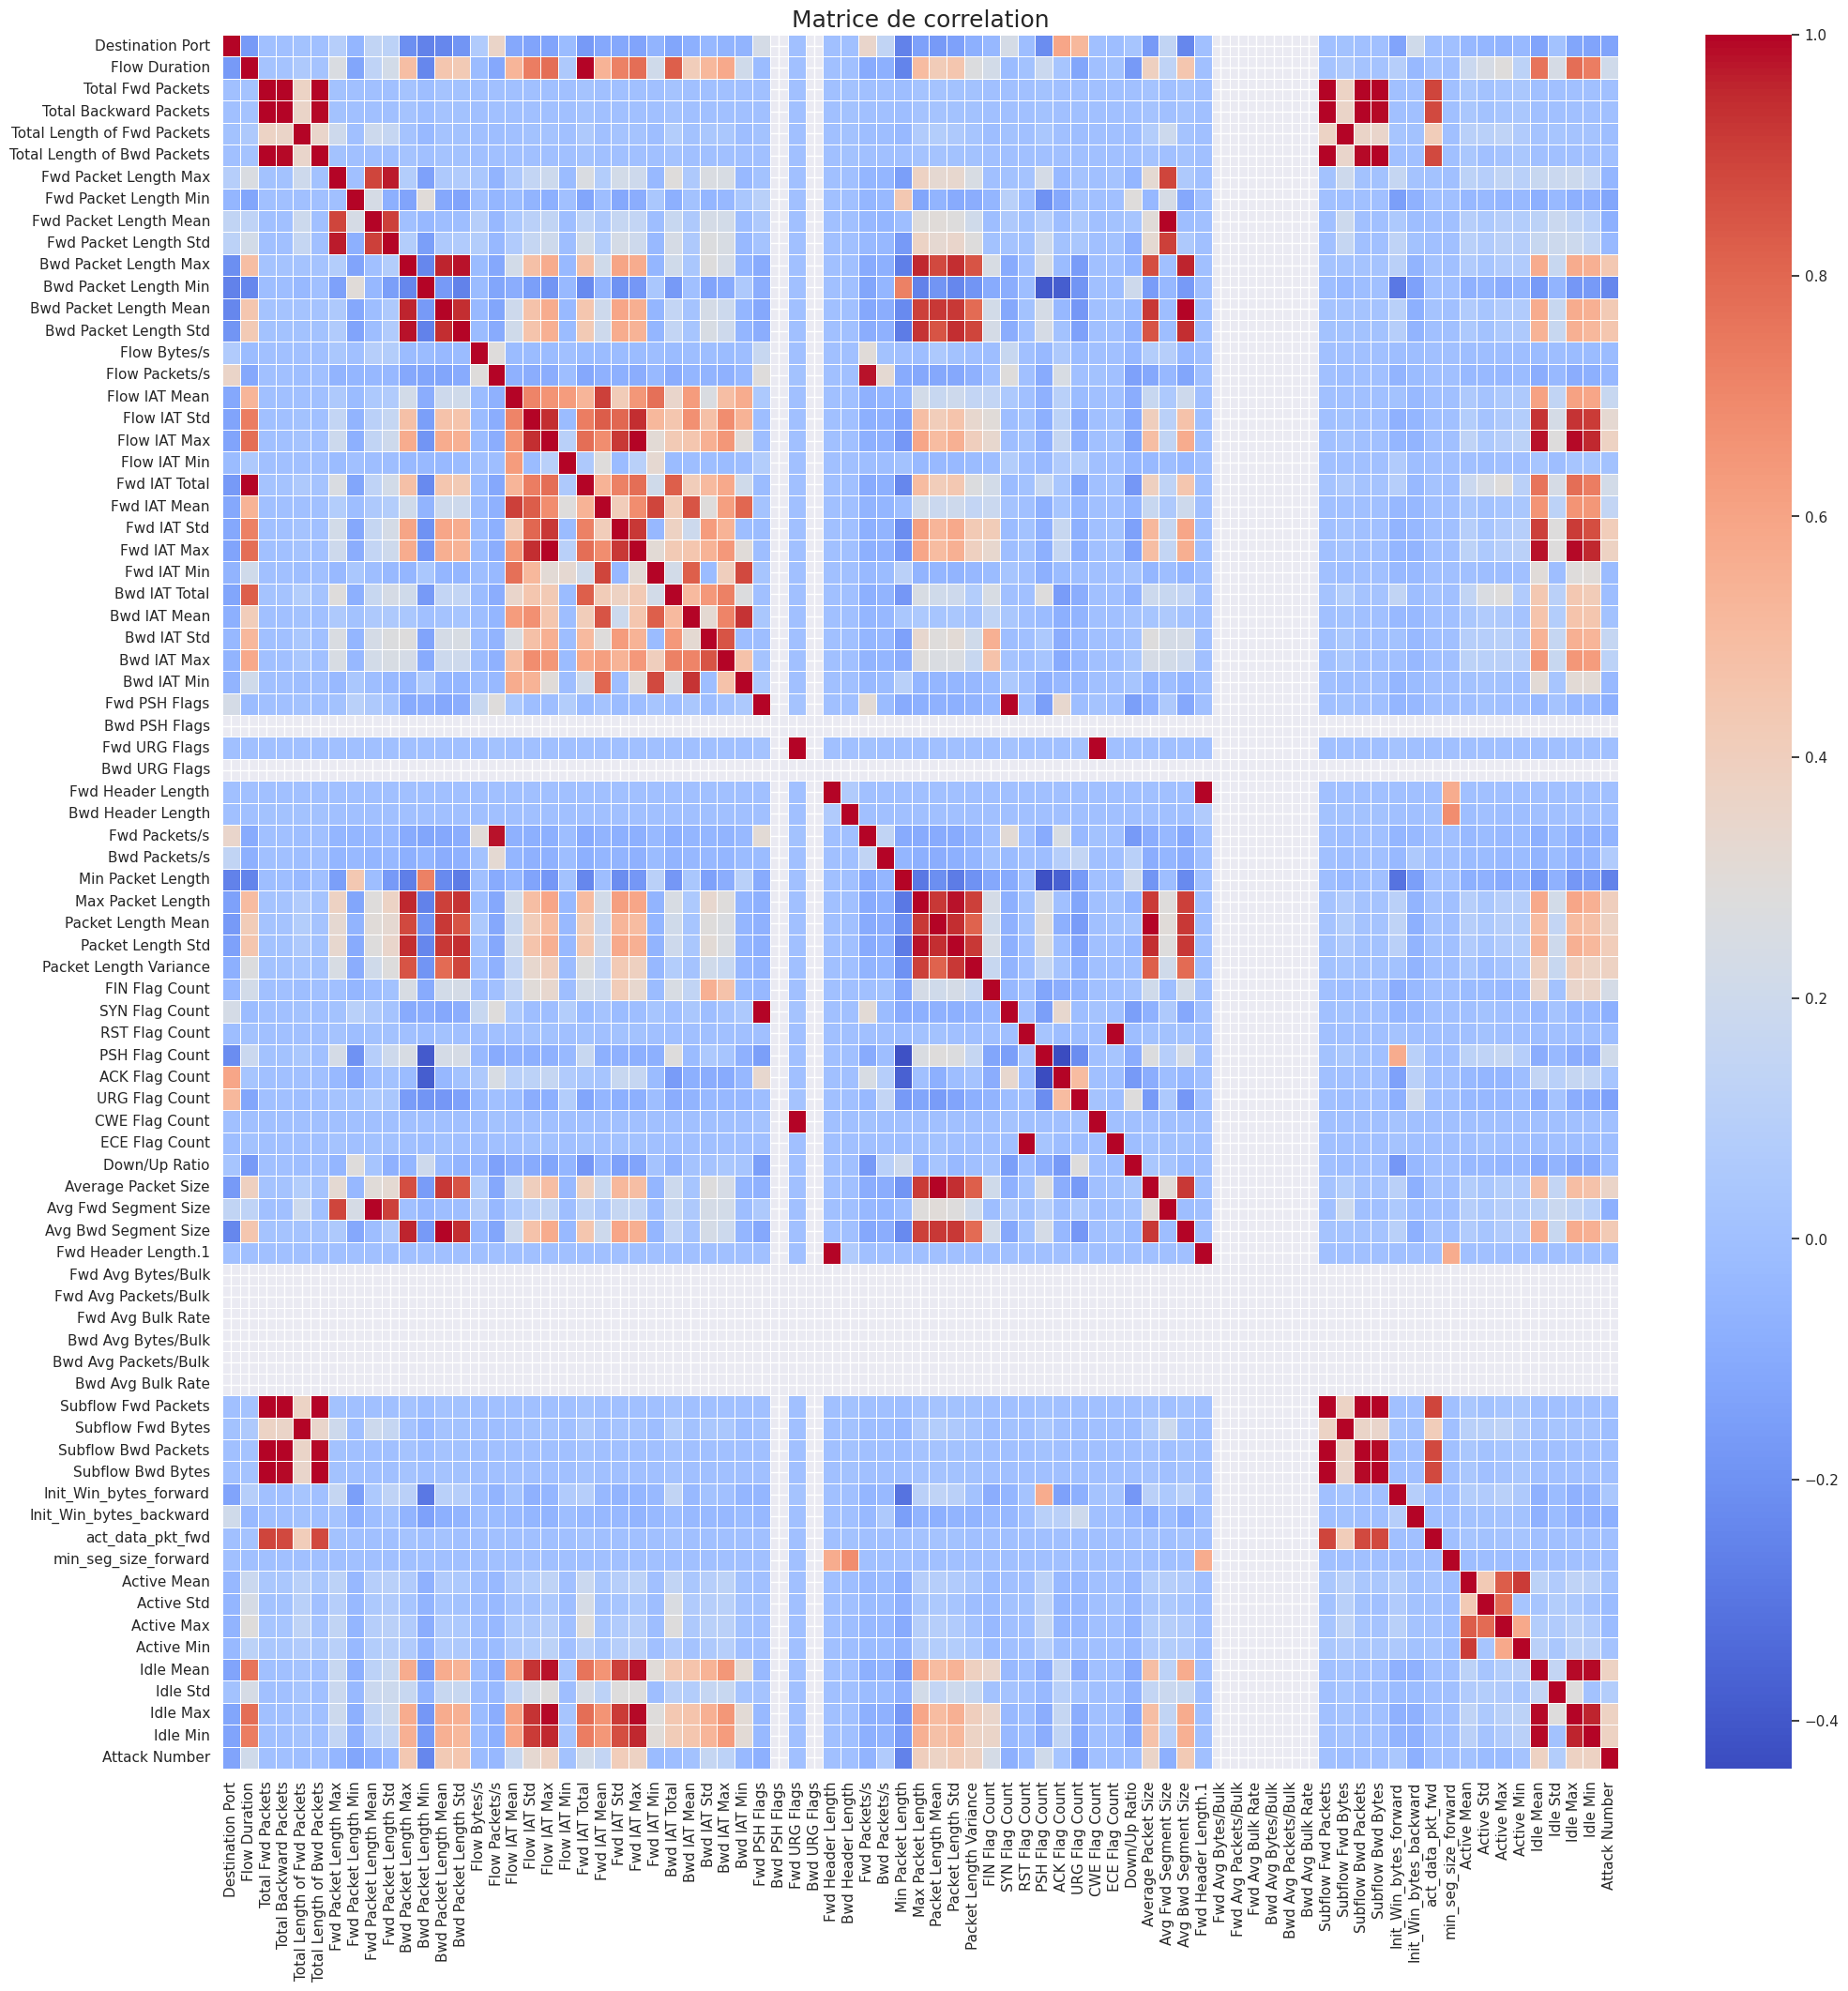

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Matrice de correlation', fontsize = 18)
plt.show()

In [ ]:
# Caracteristiques de correlation positive pour 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Caracteristiques avec une correlation positive avec 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Caracteristiques avec une correlation positive avec 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean      

In [ ]:
print(f'Nombre de caracteristiques importantes considerables: {len(pos_corr_features)}')

Nombre de caracteristiques importantes considerables: 32


In [ ]:
# Verification des colonnes avec un ecart type nul (les cases vides dans la carte thermique)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

- Nous avons mappé chaque lable à son type d'attaque correspondant, ce qui permet de regrouper des attaques similaires et d'analyser le jeu de données de manière plus interprétable, facilitant ainsi l'identification de motifs dans les différents types d'attaques.

- Pour tracer **la matrice de corrélation**, nous avons encodé la colonne **'Attack Type'** et généré **la carte thermique (heatmap)**. Cette carte a révélé qu'il existe de nombreuses paires de caractéristiques fortement corrélées. Les caractéristiques **fortement corrélées** peuvent poser des problèmes, notamment mener à un **sur-apprentissage (overfitting)**. Une corrélation positive existe lorsque l'une des variables augmente tandis que l'autre augmente aussi, ou lorsque l'une diminue tandis que l'autre diminue.

- Nous avons aussi identifié **32 caractéristiques** présentant des corrélations positives qui pourraient être utiles pour prédire la variable cible.

- En outre, certaines colonnes ont une **écart-type nul**, ce qui signifie qu'elles ont la même valeur dans toutes les lignes, n'ayant donc aucune variance. Ces colonnes n'apportent aucune information pertinente pour différencier les classes ou groupes de données. Par conséquent, elles apparaissent comme vides dans la carte thermique et ne contribuent pas à la matrice de corrélation. Ces colonnes *peuvent être supprimées* lors de la phase de traitement des données, car elles ne sont *pas utiles pour l'analyse*.

#### Visualisation des relations linéaires des colonnes (variables numériques continues)

In [ ]:
# Echantillonnage de donnees pour l analyse des donnees
sample_size = int(0.2 * len(data)) # 20% de la taille d origine
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 80)

In [ ]:
# Pour evaluer si un echantillon est representatif de la population et comparaison des statistiques descriptives (moyenne)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()  # Selectionner les colonnes numeriques
print('Comparaison des statistiques descriptives (moyenne):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Ensemble de données dorigine', 'Ensemble de données échantillonnées', 'Pourcentage de variation'))
print('-' * 96)

high_variations = []  # Liste pour stocker les caracteristiques avec une variation > 5%
for col in numeric_cols:
    old = data[col].describe().iloc[1]  # Utilisation de .iloc[1] pour recuperer la moyenne
    new = sampled_data[col].describe().iloc[1]  # Utilisation de .iloc[1] pour recuperer la moyenne
    if old == 0:
        pct = 0  # Si la moyenne est 0, la variation est 0
    else:
        pct = abs((new - old) / old)  # Calcul de la variation en pourcentage
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))  # Ajouter à la liste si la variation est > 5%
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))


Comparaison des statistiques descriptives (moyenne):

Feature                         Ensemble de données dorigineEnsemble de données échantillonnéesPourcentage de variation
------------------------------------------------------------------------------------------------
Destination Port                8704.762165           8686.623973           0.21%
Flow Duration                   16581323.773163       16502842.174093       0.47%
Total Fwd Packets               10.276271             12.078062             17.53%
Total Backward Packets          11.565964             13.914412             20.30%
Total Length of Fwd Packets     611.575108            601.844586            1.59%
Total Length of Bwd Packets     18133.153930          24424.988089          34.70%
Fwd Packet Length Max           231.091768            230.009202            0.47%
Fwd Packet Length Min           19.194641             19.036484             0.82%
Fwd Packet Length Mean          63.470104             63.151403       

In [ ]:
# # Pour evaluer si un echantillon est representatif de la population et comparaison des statistiques descriptives (moyenne)
# numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist() #selection de toutes valeurs numerique et transformation a une liste
# print('Comparaison des statistiques descriptives (moyenne):\n')
# print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Ensemble de données dorigine', 'Ensemble de donnees echantillonnes', 'Pourcentage de variation'))
# print('-' * 96)

# high_variations = [] # utilisee pour stocker les caracteristiques dont le pourcentage de variation de la moyenne entre les deux ensembles de donnees est superieur a 5 %.
# for col in numeric_cols: # Demarre une boucle qui parcourt chaque colonne numerique dans la liste numeric_cols
#     old = data[col].describe()[1] #la methode describe() est utilisee pour calculer les statistiques descriptives describe() retourne un DataFrame avec des statistiques telles que la moyenne (mean), l ecart-type (std)....
#     new = sampled_data[col].describe()[1] # de meme est [1] recupere la moyenne
#     if old == 0: # si la moyenne = 0
#         pct = 0 # la variation est  = 0
#     else:
#         pct = abs((new - old) / old)
#     if pct * 100 > 5:
#         high_variations.append((col, pct * 100))
#     print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

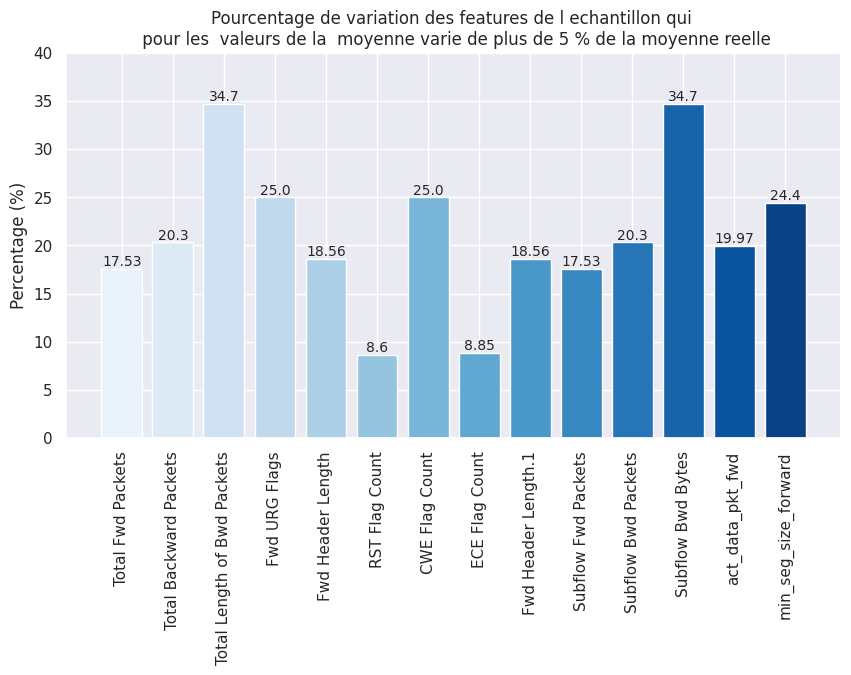

In [ ]:
labels = [t[0] for t in high_variations] #extrait le nom des colonnes (features) dont le pourcentage de variation est superieur à 5 %
values = [t[1] for t in high_variations] #extrait les pourcentages de variation (valeurs numeriques) pour les colonnes de la liste high_variations

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Pourcentage de variation des features de l echantillon qui \n pour les  valeurs de la  moyenne varie de plus de 5 % de la moyenne reelle')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [ ]:
# Impression du nombre de valeurs uniques
indent = '{:<3} {:<30}: {}'
print('Nombre de valeurs uniques pour: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Nombre de valeurs uniques pour: 
1.  Destination Port              : 33346
2.  Flow Duration                 : 256627
3.  Total Fwd Packets             : 659
4.  Total Backward Packets        : 820
5.  Total Length of Fwd Packets   : 9070
6.  Total Length of Bwd Packets   : 23963
7.  Fwd Packet Length Max         : 3701
8.  Fwd Packet Length Min         : 236
9.  Fwd Packet Length Mean        : 34946
10. Fwd Packet Length Std         : 66038
11. Bwd Packet Length Max         : 3936
12. Bwd Packet Length Min         : 449
13. Bwd Packet Length Mean        : 45585
14. Bwd Packet Length Std         : 62492
15. Flow Bytes/s                  : 346856
16. Flow Packets/s                : 288294
17. Flow IAT Mean                 : 274182
18. Flow IAT Std                  : 229680
19. Flow IAT Max                  : 167860
20. Flow IAT Min                  : 45941
21. Fwd IAT Total                 : 119784
22. Fwd IAT Mean                  : 164556
23. Fwd IAT Std                   : 148638
24.

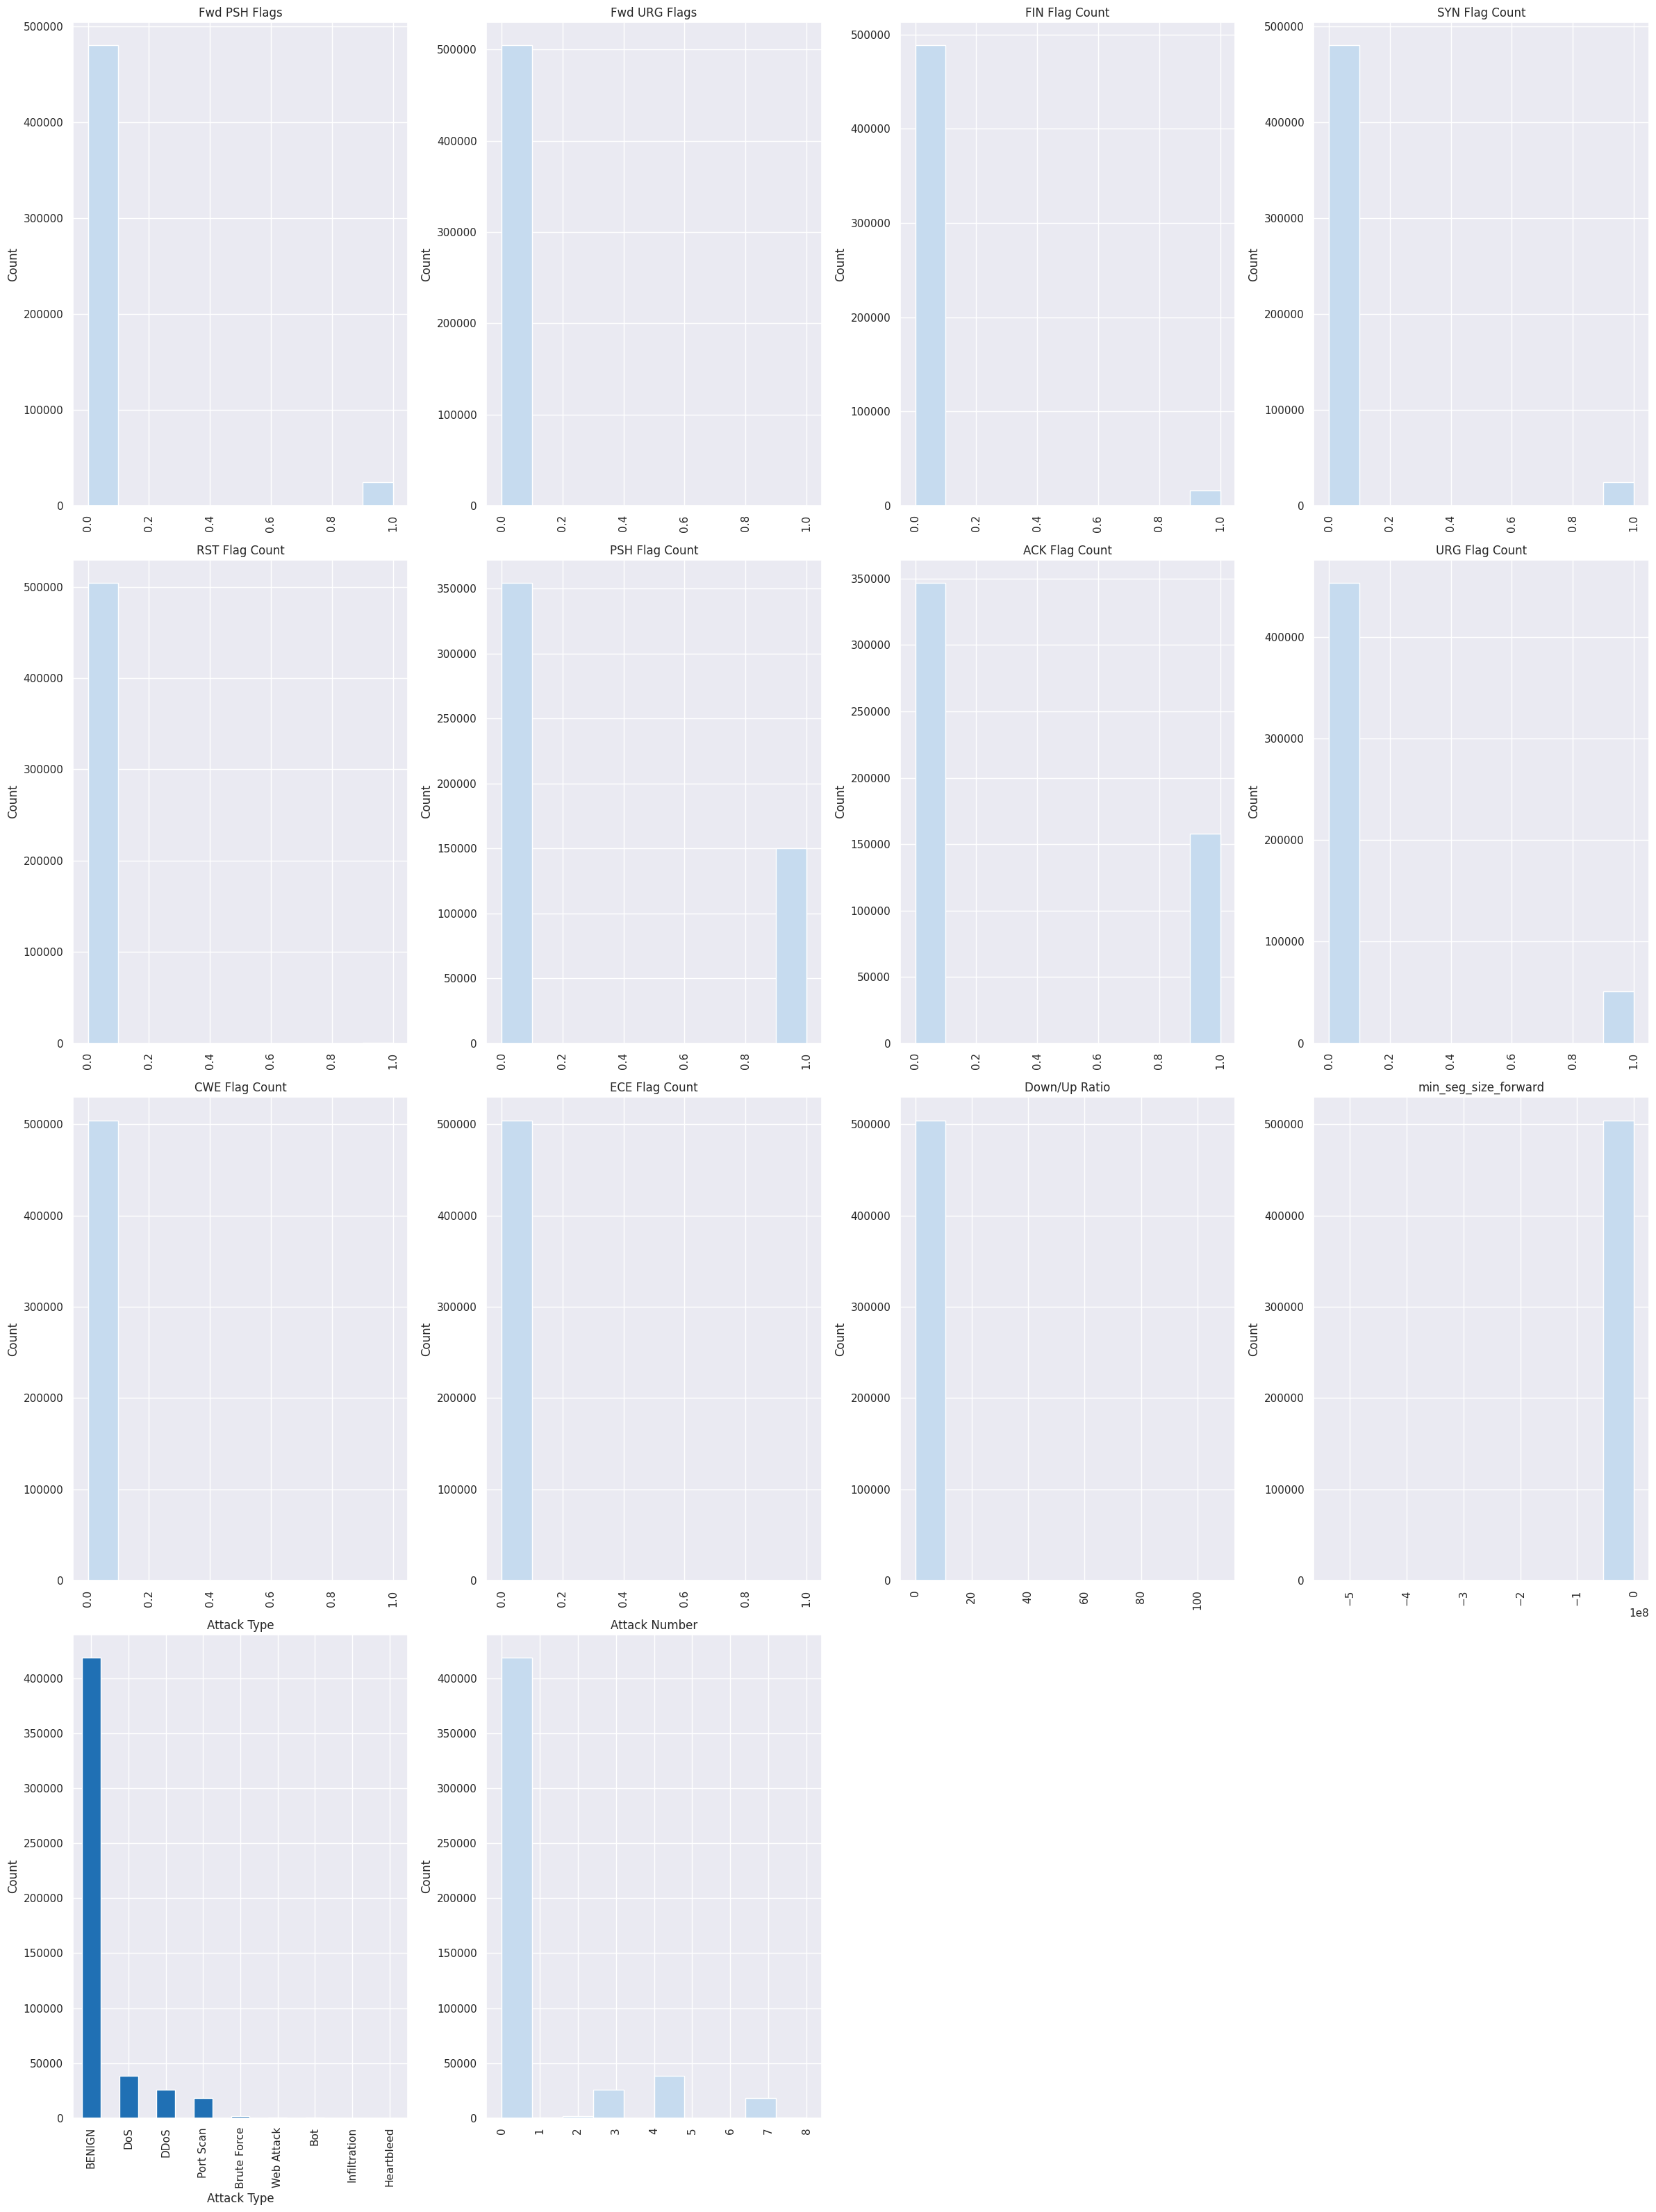

In [ ]:
# Generation d un ensemble de visualisations pour les colonnes qui ont plus d une valeur unique mais moins de 50 valeurs uniques.
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [ ]:
# Matrice de correlation ce sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
# Trace des paires de caracteristiques fortement correlees positivement dans les donnees echantillonnees qui ont un coefficient de correlation de 0,85 ou plus
cols = list(sampled_data.columns)[:-2]
high_corr_pairs = []
corr_th = 0.85

for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = sampled_data[cols[i]].corr(sampled_data[cols[j]])
    # Si le coefficient de correlation est NaN ou inferieur au seuil, passez a la paire suivante
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
# Identifier les valeurs aberrantes (valeurs injuste)
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25) #calcule le premier quartile (Q1)
q3 = numeric_data.quantile(0.75) #Calcul du troisième quartile (Q3)
iqr = q3 - q1 # calcul l intervalle interquartile (IQR)
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr)) #Detection des valeurs aberrantes
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    109246               21.66
Flow Duration                        93195               18.47
Total Fwd Packets                    50245                9.96
Total Backward Packets               47509                9.42
Total Length of Fwd Packets          62790               12.45
Total Length of Bwd Packets         114959               22.79
Fwd Packet Length Max                49348                9.78
Fwd Packet Length Min                 2490                0.49
Fwd Packet Length Mean               35398                7.02
Fwd Packet Length Std                47567                9.43
Bwd Packet Length Max                74464               14.76
Bwd Packet Length Min                13428                2.66
Bwd Packet Length Mean               87290               17.30
Bwd Packet Length Std                91318               18.10
Flow Bytes/s                         94952             

In [ ]:
# Identification des valeurs aberrantes en fonction du type d attaque
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Destination Port
- BENIGN: 93525 (22.33%)
- DoS: 0 (0.00%)
- DDoS: 2 (0.01%)
- Port Scan: 2305 (12.51%)
- Brute Force: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Bot: 0 (0.00%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: Flow Duration
- BENIGN: 97175 (23.20%)
- DoS: 8444 (21.87%)
- DDoS: 4397 (16.96%)
- Port Scan: 403 (2.19%)
- Brute Force: 443 (23.86%)
- Web Attack: 67 (15.62%)
- Bot: 0 (0.00%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Fwd Packets
- BENIGN: 77615 (18.53%)
- DoS: 464 (1.20%)
- DDoS: 833 (3.21%)
- Port Scan: 272 (1.48%)
- Brute Force: 0 (0.00%)
- Web Attack: 68 (15.85%)
- Bot: 7 (1.82%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Backward Packets
- BENIGN: 59799 (14.28%)
- DoS: 4479 (11.60%)
- DDoS: 0 (0.00%)
- Port Scan: 97 (0.53%)
- Brute Force: 0 (0.00%)
- Web Attack: 36 (8.39%)
- Bot: 7 (1.82%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Length of Fwd Packets
- BENIGN: 80997 (19

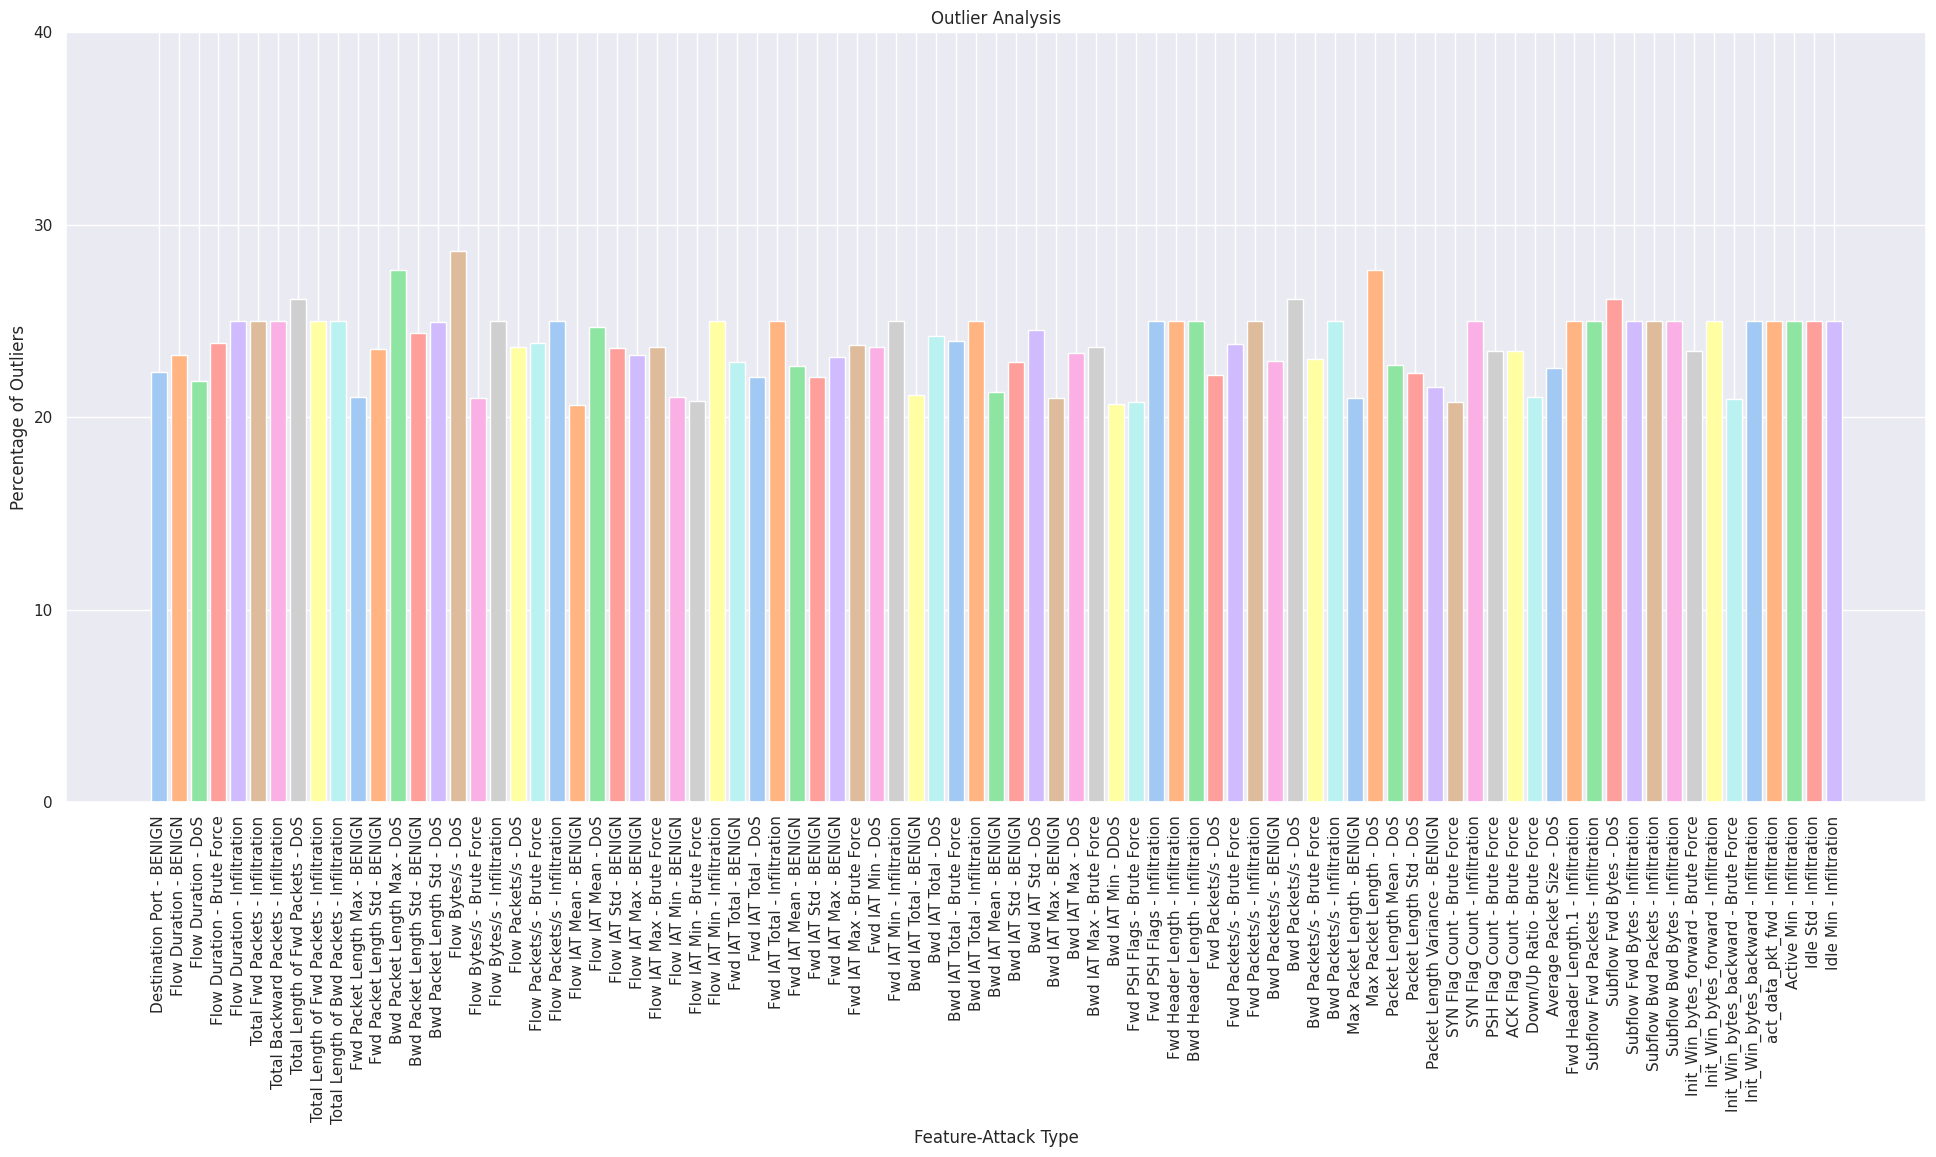

In [ ]:
# Représentation graphique du pourcentage de valeurs aberrantes supérieures à 20 %
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

- Dans cette analyse, en raison de la taille importante du jeu de données, nous avons échantillonné 20 % des données pour effectuer les analyses computationnellement coûteuses. Nous avons ensuite évalué si cet échantillon était représentatif de la population en comparant les statistiques descriptives (moyenne) et en identifiant les caractéristiques dont les valeurs varient de plus de 5 % par rapport aux moyennes réelles des données.

- Des histogrammes pour les colonnes numériques et des diagrammes en barres pour les colonnes catégorielles (ayant plus d'une valeur unique et moins de 50 valeurs uniques) ont été générés. Ces graphiques permettent de visualiser rapidement la distribution des données, mettant en évidence les tendances et les anomalies dans les colonnes numériques et les catégories les plus courantes dans les colonnes catégorielles.

- Des graphiques de dispersion ont été utilisés pour examiner les relations entre les caractéristiques fortement corrélées (avec un coefficient de corrélation supérieur à 0,85). Les points de dispersion bleus montrent les paires de corrélations inférieures à 0,99, tandis que les points verts illustrent des paires ayant des coefficients de corrélation proches de 1. Ces graphiques permettent de visualiser les relations linéaires entre les caractéristiques et d'identifier d'éventuels problèmes de **multicolinéarité**, où deux ou plusieurs prédicteurs sont fortement corrélés, ce qui peut poser problème pour les algorithmes d'apprentissage automatique.

- Enfin, les **valeurs aberrantes** ont été identifiées pour chaque caractéristique en fonction des types d'attaque. Bien que les valeurs aberrantes augmentent la variabilité des données, elles peuvent également indiquer des motifs intéressants, comme des tentatives d'intrusion dans le réseau.

#### Visualisation des relations entre les colonnes (variables categorielles)

Toutes les features de notre jeu de donnees sont numeriques. Nous avons une variable categorielle.

<ipython-input-53-b84d53b79a51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


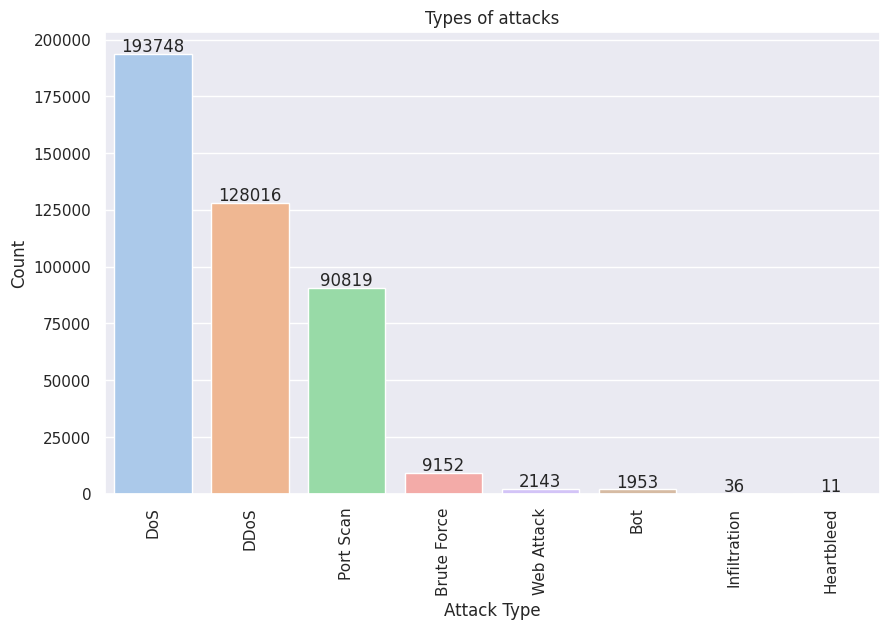

In [ ]:
# Differents 'Attack Type' dans lensemble de donnees principal, a l exclusion de 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

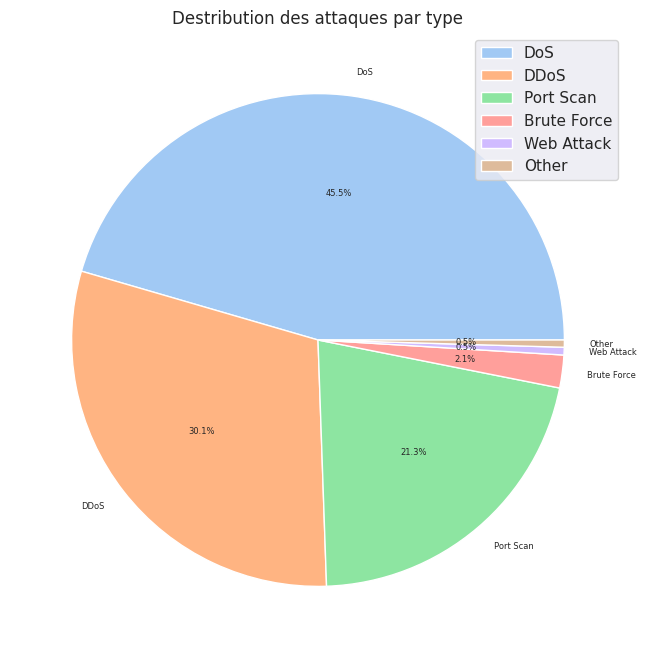

In [ ]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Destribution des attaques par type')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [ ]:
data.groupby('Attack Type').first()

Destination Port  Flow Duration  Total Fwd Packets  \
Attack Type                                                        
BENIGN                   49188              4                  2   
Bot                       8080       60202640                  9   
Brute Force                 80        5216127                  3   
DDoS                        80        1293792                  3   
DoS                         80        5169956                  8   
Heartbleed                 444      119302728               2685   
Infiltration               444       42664070                  5   
Port Scan                   80        5021059                  6   
Web Attack                  80        5185118                  7   

              Total Backward Packets  Total Length of Fwd Packets  \
Attack Type                                                         
BENIGN                             0                           12   
Bot                                9                          322   
Brute Force                        1                            0   
DDoS                               7                           26   
DoS                                6                         1101   
Heartbleed                      1729                         8299   
Infiltration                       6                          141   
Port Scan                          5                          703   
Web Attack                         7                         1022   

              Total Length of Bwd Packets  Fwd Packet Length Max  \
Attack Type                                                        
BENIGN                                  0                      6   
Bot                                   256                    322   
Brute Force                             0                      0   
DDoS                                11607                     20   
DoS                                  4222                    410   
Heartbleed                        7556917                    517   
Infiltration                          291                     93   
Port Scan                            1414                    356   
Web Attack                           2321                    372   

              Fwd Packet Length Min  Fwd Packet Length Mean  \
Attack Type                                                   
BENIGN                            6                6.000000   
Bot                               0               35.777778   
Brute Force                       0                0.000000   
DDoS                              0                8.666667   
DoS                               0              137.625000   
Heartbleed                        0                3.090875   
Infiltration                      0               28.200000   
Port Scan                         0              117.166667   
Web Attack                        0              146.000000   

              Fwd Packet Length Std  Bwd Packet Length Max  \
Attack Type                                                  
BENIGN                     0.000000                      0   
Bot                      107.333333                    256   
Brute Force                0.000000                      0   
DDoS                      10.263203                   5840   
DoS                      185.758628                   3525   
Heartbleed                16.858421                  17376   
Infiltration              38.861292                    267   
Port Scan                181.536131                   1050   
Web Attack               184.078788                   1047   

              Bwd Packet Length Min  Bwd Packet Length Mean  \
Attack Type                                                   
BENIGN                            0                0.000000   
Bot                               0               28.444444   
Brute Force                       0                0.000000   
DDoS                              0             1658.142857   
D

## 3.Pretraitement des donnees(Data Preprocessing)

### Preprocessing

In [ ]:
# Pour ameliorer les performances et reduire les erreurs liees a la memoire
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Conversion de float64 en float3
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Conversion de int64 en int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 808.25 MB


In [ ]:
# Calcul du pourcentage de reduction de l utilisation de la memoire
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 47.50%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522362 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  Flow I

In [ ]:
data.describe().transpose()

count          mean           std  \
Destination Port             2522362.0  8.704762e+03  1.902507e+04   
Flow Duration                2522362.0  1.658132e+07  3.522426e+07   
Total Fwd Packets            2522362.0  1.027627e+01  7.941738e+02   
Total Backward Packets       2522362.0  1.156596e+01  1.056594e+03   
Total Length of Fwd Packets  2522362.0  6.115751e+02  1.058499e+04   
Total Length of Bwd Packets  2522362.0  1.813315e+04  2.397434e+06   
Fwd Packet Length Max        2522362.0  2.310918e+02  7.561625e+02   
Fwd Packet Length Min        2522362.0  1.919464e+01  6.079447e+01   
Fwd Packet Length Mean       2522362.0  6.347013e+01  1.952963e+02   
Fwd Packet Length Std        2522362.0  7.727757e+01  2.961174e+02   
Bwd Packet Length Max        2522362.0  9.743700e+02  2.037859e+03   
Bwd Packet Length Min        2522362.0  4.313467e+01  7.087022e+01   
Bwd Packet Length Mean       2522362.0  3.404135e+02  6.350376e+02   
Bwd Packet Length Std        2522362.0  3.763118e+02  8.780369e+02   
Flow Bytes/s                 2522362.0  1.409834e+06  2.653223e+07   
Flow Packets/s               2522362.0  4.726262e+04  2.024083e+05   
Flow IAT Mean                2522362.0  1.445245e+06  4.609649e+06   
Flow IAT Std                 2522362.0  3.276119e+06  8.512021e+06   
Flow IAT Max                 2522362.0  1.029310e+07  2.567868e+07   
Flow IAT Min                 2522362.0  1.703157e+05  3.013372e+06   
Fwd IAT Total                2522362.0  1.624176e+07  3.515781e+07   
Fwd IAT Mean                 2522362.0  2.917448e+06  9.831050e+06   
Fwd IAT Std                  2522362.0  3.666366e+06  1.021767e+07   
Fwd IAT Max                  2522362.0  1.013665e+07  2.575975e+07   
Fwd IAT Min                  2522362.0  1.134967e+06  9.056733e+06   
Bwd IAT Total                2522362.0  1.110336e+07  3.022113e+07   
Bwd IAT Mean                 2522362.0  2.026477e+06  9.256496e+06   
Bwd IAT Std                  2522362.0  1.667646e+06  6.533546e+06   
Bwd IAT Max                  2522362.0  5.257358e+06  1.809655e+07   
Bwd IAT Min                  2522362.0  1.085438e+06  8.794528e+06   
Fwd PSH Flags                2522362.0  4.873805e-02  2.153199e-01   
Bwd PSH Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2522362.0  3.171630e-05  5.631635e-03   
Bwd URG Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2522362.0 -2.918210e+04  2.230271e+07   
Bwd Header Length            2522362.0 -2.553644e+03  1.538422e+06   
Fwd Packets/s                2522362.0  4.083433e+04  1.909485e+05   
Bwd Packets/s                2522362.0  6.509477e+03  3.788238e+04   
Min Packet Length            2522362.0  1.682349e+01  2.557873e+01   
Max Packet Length            2522362.0  1.063098e+03  2.121197e+03   
Packet Length Mean           2522362.0  1.905415e+02  3.177694e+02   
Packet Length Std            2522362.0  3.299987e+02  6.619749e+02   
Packet Length Variance       2522362.0  5.454386e+05  1.735212e+06   
FIN Flag Count               2522362.0  3.214685e-02  1.763900e-01   
SYN Flag Count               2522362.0  4.873805e-02  2.153199e-01   
RST Flag Count               2522362.0  2.719673e-04  1.648919e-02   
PSH Flag Count               2522362.0  2.975192e-01  4.571669e-01   
ACK Flag Count               2522362.0  3.121875e-01  4.633860e-01   
URG Flag Count               2522362.0  1.014276e-01  3.018941e-01   
CWE Flag Count               2522362.0  3.171630e-05  5.631635e-03   
ECE Flag Count               2522362.0  2.731567e-04  1.652520e-02   
Down/Up Ratio                2522362.0  7.003495e-01  6.955667e-01   
Average Packet Size          2522362.0  2.123115e+02  3.456645e+02   
Avg Fwd Segment Size         2522362.0  6.347013e+01  1.952963e+02   
Avg Bwd Segment Size         2522362.0  3.404135e+02  6.350376e+02   
Fwd Header Length.1          2522362.0 -2.918210e+04  2.230271e+07   
Fwd Avg Bytes/Bulk           2522362.0  0.0

In [ ]:
# Suppression des colonnes avec une seule valeur unique
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [ ]:
data.shape

(2522362, 71)

In [ ]:
# Colonnes apres suppression des colonnes non variantes
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

In [ ]:
#data.to_csv('/content/drive/MyDrive/Balanced_dataset/data_cic_ids_2017.csv', index = False)

- Pour améliorer les performances et réduire le risque d’erreurs liées à la mémoire (notamment les crashs de session), nous avons **réduit la taille des données numériques (downcasting)** pour les variables de type float et entier, en fonction de leurs valeurs minimales et maximales. Cette optimisation a permis de **réduire l'utilisation de la mémoire **, rendant le traitement des données plus efficace.  

- De plus, nous avons identifié et supprimé les **colonnes avec une déviation standard nulle**, car elles contiennent une seule et même valeur pour toutes les lignes. Ces colonnes n'apportant aucune variation, elles n'ont **aucune influence sur l'analyse des données** et ne permettent pas de différencier les classes ou les motifs du jeu de données. Leur suppression a permis d’optimiser le modèle et d’améliorer la pertinence des analyses.

### Application de PCA pour reduire les dimensions

- Une méthode simple et efficace pour **réduire la dimensionnalité** du jeu de données et **améliorer les performances du modèle** consiste à utiliser les **features fortement corrélées**. Nous avons appliqué **l'encodage des labels** sur la variable cible, mais comme les valeurs numériques attribuées aux catégories n'ont pas de signification intrinsèque, la **matrice de corrélation** obtenue ne reflète pas toujours fidèlement les relations réelles entre les variables.  

- Pour une **sélection de features plus flexible**, nous avons utilisé **l'Analyse en Composantes Principales (PCA)**. Le PCA est une technique qui transforme un ensemble initial de variables en un **ensemble réduit de variables non corrélées**, appelées **composantes principales**.  

- Le PCA permet de **capturer des relations complexes** entre les variables qui ne sont pas forcément visibles avec une analyse de corrélation classique. Il aide également à **réduire le risque de sur-apprentissage (overfitting)**.  

- Nous avons appliqué **l'Incremental PCA**, une variante du PCA adaptée aux **grands jeux de données**, permettant de **calculer efficacement les composantes principales sans surcharger la mémoire**.  

- Avant d’effectuer l’Incremental PCA, nous avons utilisé **StandardScaler** pour **normaliser** les valeurs des données et les mettre sur une échelle standard, garantissant ainsi de meilleures performances du modèle.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Balanced_dataset/data_cic_ids_2017.csv')

In [ ]:
# Normalisation du DataSet
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'informations conservees: {sum(ipca.explained_variance_ratio_):.2%}')

informations conservees: 99.30%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       -2.357605 -0.054980  0.577367  0.734454  3.730371  0.234648 -0.015694   
1       -2.883854 -0.069938  0.911321  1.763147  8.846136  0.620454 -0.056858   
2       -2.416928 -0.056683  0.615335  0.850869  4.304213  0.275779 -0.020438   
3       -2.884705 -0.069978  0.912183  1.765263  8.851561  0.618717 -0.057028   
4       -1.505248  0.080886 -0.504396  0.290414 -0.539267  0.746103  0.100443   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -2.270966 -0.048462  0.480012  0.461159  2.163937 -0.144601 -0.016015   
2522358 -2.267921 -0.048377  0.478583  0.457923  2.144121 -0.146620 -0.015946   
2522359 -2.267236 -0.048358  0.478260  0.457172  2.139660 -0.147061 -0.015930   
2522360 -2.102459 -0.041899  0.361540  0.268739  1.795816  0.284755  0.006681   
2522361 -2.382427 -0.018449  0.397038  0.860374  2.465448  0.612889  0.069454   

              PC8       PC9      PC10  ...      PC27      PC28      PC29  \
0       -0.215593 -0.278501  1.087262  ... -0.147988 -0.334371  1.487918   
1        1.106466  1.906559 -2.756474  ...  0.282642 -2.347082  2.238826   
2       -0.070541 -0.035290  0.664153  ... -0.101730 -0.545536  1.572158   
3        1.104621  1.906986 -2.752501  ...  0.281052 -2.334612  2.239632   
4        0.732508 -1.145775 -0.563206  ... -0.599155  0.116353  0.795041   
...           ...       ...       ...  ...       ...       ...       ...   
2522357 -0.777804 -0.908055  2.711084  ... -0.043101  0.787857  0.785667   
2522358 -0.780613 -0.911196  2.717732  ... -0.041162  0.789232  0.787023   
2522359 -0.781230 -0.911881  2.719162  ... -0.040728  0.789376  0.787329   
2522360 -0.296210 -0.631077  0.966695  ... -0.372704  1.793470 -0.925189   
2522361 -0.406985 -2.358812  3.918983  ...  0.295253 -0.034873 -0.032147   

             PC30      PC31      PC32      PC33      PC34      PC35  \
0       -0.163631 -0.219312 -0.004576  0.002609  0.034128 -0.015853   
1       -0.640825 -0.367420  0.010520  0.000645  0.125795 -0.190767   
2       -0.213910 -0.234609 -0.003047  0.002402  0.043993 -0.035273   
3       -0.638082 -0.366261  0.010372  0.000655  0.125475 -0.190752   
4       -0.211000  0.042492 -0.014254  0.000957 -0.052009  0.001372   
...           ...       ...       ...       ...       ...       ...   
2522357  0.247959  0.036167 -0.017415  0.001898  0.005532 -0.005967   
2522358  0.249306  0.038001 -0.017559  0.001901  0.005085 -0.006293   
2522359  0.249559  0.038386 -0.017590  0.001901  0.004988 -0.006363   
2522360  0.297419  0.128586 -0.006211  0.002178 -0.077697  0.032569   
2522361  0.247529 -0.155516  0.010317  0.000219 -0.068817 -0.001129   

         Attack Type  
0             BENIGN  
1             BENIGN  
2             BENIGN  
3             BENIGN  
4             BENIGN  
...              ...  
2522357       BENIGN  
2522358       BENIGN  
2522359       BENIGN  
2522360       BENIGN  
2522361       BENIGN  

[2522362 rows x 36 columns]

In [ ]:
new_data.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'Attack Type'],
      dtype='object')

#### sauvegarde de StandarScalar et ipca pour des nouvelles predection futur

In [ ]:
import joblib

# Sauvegarder le StandardScaler
joblib.dump(scaler, '/content/drive/MyDrive/PCA_SCALER/scaler.pkl')

# Sauvegarder le modèle PCA
joblib.dump(ipca, '/content/drive/MyDrive/PCA_SCALER/pca_model.pkl')


['/content/drive/MyDrive/PCA_SCALER/pca_model.pkl']

## 4.Les modeles de machine learning

In [ ]:
# Pour la validation croisee (cross validation )
from sklearn.model_selection import cross_val_score

### Creation dune dataset equilibre pour la classification binaire

- Nous savons qu’un **jeu de données équilibré** est essentiel en **apprentissage automatique**, car il garantit que chaque classe est représentée de manière **équitable**. Cela signifie que le **nombre d’observations** dans chaque classe est **à peu près le même**, ce qui **évite que le modèle ne soit biaisé** en faveur de la classe majoritaire. Un **jeu de données déséquilibré** peut entraîner une **mauvaise performance du modèle**, car celui-ci pourrait avoir des **difficultés à prédire les classes minoritaires**.  

- Comme nous avons constaté que notre **jeu de données est fortement déséquilibré**, nous avons utilisé **SMOTE (Synthetic Minority Over-sampling Technique)** pour **augmenter artificiellement** les échantillons des classes minoritaires. Cette technique nous a permis de **créer un jeu de données équilibré** pour la **classification multi-classes**, améliorant ainsi les performances des modèles de classification.

In [ ]:
# Creation dun ensemble de donnees equilibre pour la classification binaire
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
1    7509
0    7491
Name: count, dtype: int64


In [ ]:
#bc_data.to_csv('/content/drive/MyDrive/Balanced_dataset/binary_balanced_data.csv', index = False)

In [ ]:
bc_data = pd.read_csv('/content/drive/MyDrive/Balanced_dataset/binary_balanced_data.csv')

In [ ]:
# Diviser les donnees en entites (X) et cible (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

### Support Vector Machine (Binary Classification)

- La **Support Vector Machine** ou **Support Vector Machine (SVM)** est un algorithme d’apprentissage supervisé utilisé pour la **classification** et la **régression**. Son principe repose sur la recherche d’un **hyperplan optimal** dans un espace de haute dimension, permettant de **séparer** efficacement les différentes classes de données.  

 *Paramètres :*
- **kernel** : Définit le **type de fonction noyau** utilisé pour transformer les données. Dans notre cas, nous avons utilisé les noyaux **rbf** et **poly**.  
- **C** : Contrôle le **compromis** entre la **maximisation de la marge** et la **minimisation des erreurs de classification**.  
- **gamma** : Détermine l’**influence** d’un exemple d’apprentissage individuel sur la frontière de décision.  
- **random_state** : Garantit que les résultats obtenus sont **déterministes et reproductibles**.

#### Utilisation de randomized searche pour choiir la melleiure combinaison des parametres

In [ ]:
# Utilisation de randomized searche pour choiir la melleiure combinaison des parametres pour une kernel 'RBF'
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC

# Definition des distributions pour C et gamma
param_dist = {
    'C': uniform(0.1, 10),  # C entre 0.1 et 10
    'gamma': uniform(0.01, 1)  # gamma entre 0.01 et 1
}
svm = SVC(kernel='rbf', random_state=0, probability=True)

# RandomizedSearchCV
random_search = RandomizedSearchCV(svm, param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=0)
random_search.fit(X_train_bc, y_train_bc)

# Meilleurs parametres et score
print("Meilleurs paramètres:", random_search.best_params_)
print("Meilleur score:", random_search.best_score_)

Meilleurs paramètres: {'C': 9.736627605010293, 'gamma': 0.3934415188257777}
Meilleur score: 0.9725333333333334


In [ ]:
# Utilisation de randomized searche pour choiir la melleiure combinaison des parametres pour une kernel 'POLY'

param_dist = {
    'C': uniform(0.1, 10),         # C entre 0.1 et 10
}

# Modèle SVM avec kernel polynomial
svm_poly = SVC(kernel='poly', random_state=0, probability=True)

# RandomizedSearchCV
random_search_poly = RandomizedSearchCV(
    svm_poly, param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=0
)
random_search_poly.fit(X_train_bc, y_train_bc)

# Meilleurs paramètres et score
print("Meilleurs paramètres:", random_search_poly.best_params_)
print("Meilleur score:", random_search_poly.best_score_)


Meilleurs paramètres: {'C': 9.736627605010293}
Meilleur score: 0.9529777777777777


#### SVM avec deux kernel def

In [ ]:
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 9.736627605010293, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nScores de validation croisee (Cross-validation scores):', ', '.join(map(str, cv_svm1)))
print(f'\nScore moyen de validation croisee (Mean cross-validation score): {cv_svm1.mean():.2f}')

Support Vector Machine Model 1

Scores de validation croisee (Cross-validation scores): 0.9555555555555556, 0.9555555555555556, 0.9475555555555556, 0.9528888888888889, 0.9533333333333334

Score moyen de validation croisee (Mean cross-validation score): 0.95


In [ ]:
svm2 = SVC(kernel = 'rbf', C =  9.736627605010293, gamma = 0.3934415188257777, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nScores de validation croisee (Cross-validation scores):', ', '.join(map(str, cv_svm2)))
print(f'\nScore moyen de validation croisee (Mean cross-validation score): {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Scores de validation croisee (Cross-validation scores): 0.9746666666666667, 0.9728888888888889, 0.9684444444444444, 0.9751111111111112, 0.9715555555555555

Score moyen de validation croisee (Mean cross-validation score): 0.97


In [ ]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: -0.6705055097475685
SVM Model 2 intercept: -0.37208006402816796


- Cela signifie que l’hyperplan de séparation de svm1 a un biais de -0.67, et celui de svm2 un biais de -0.37.

#### save SVM models

In [ ]:
import joblib

# Enregistrer le modele entraine
joblib.dump(svm1, '/content/drive/MyDrive/models/svm_poly_model.pkl')

# Charger le modele plus tard
# svm_loaded = joblib.load('svm_poly_model.pkl')

['/content/drive/MyDrive/models/svm_poly_model.pkl']

In [ ]:
import joblib

# Enregistrer le modèle entraîné
joblib.dump(svm2, '/content/drive/MyDrive/models/svm_rbf_model.pkl')

# Charger le modèle plus tard
# svm_loaded = joblib.load('svm_rbf_model.pkl')

['/content/drive/MyDrive/models/svm_rbf_model.pkl']

### Creation dune dataset equelibre pour une classification multi-calss (Multi-class classification)




In [ ]:
new_data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [ ]:
#adysn
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    # df = df.sample(n = 5000, random_state = 0)
    df = df.sample(n = 2500, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         2500
DoS            2500
DDoS           2500
Port Scan      2500
Brute Force    2500
Web Attack     2143
Bot            1953
Name: count, dtype: int64

In [ ]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]  # Tu peux le mettre > 10_000 si tu veux des classes avec 10 000 au moins
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
    df = selected[selected['Attack Type'] == name]
    if len(df) > 10000:
        df = df.sample(n=10000, random_state=0)  # ✨ Échantillonnage à 10 000
    elif len(df) < 10000:
        # ✨ Oversampling si la classe a moins de 10 000 exemples
        df = df.sample(n=10000, replace=True, random_state=0)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
print(df['Attack Type'].value_counts())


Attack Type
BENIGN         10000
DoS            10000
DDoS           10000
Port Scan      10000
Brute Force    10000
Web Attack     10000
Bot            10000
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
DDoS           10000
BENIGN         10000
Brute Force    10000
Bot            10000
Port Scan      10000
DoS            10000
Web Attack     10000
Name: count, dtype: int64

In [ ]:
#blnc_data.to_csv('/content/drive/MyDrive/Balanced_dataset/Multi_balanced_data.csv', index = False)
blnc_data.to_csv('/content/drive/MyDrive/Balanced_dataset/Multi_balanced_data_10000.csv', index = False)

In [ ]:
blnc_data= pd.read_csv('/content/drive/MyDrive/Balanced_dataset/Multi_balanced_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split

features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5)

print(f"Scores validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.4f}")

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encodage des labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Affichage de la correspondance entre les numeros et les types dattaque
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Correspondance entre les numéros et les types d'attaque :")
for attack, num in label_mapping.items():
    print(f"{num} -> {attack}")


Correspondance entre les numéros et les types d'attaque :
0 -> BENIGN
1 -> Bot
2 -> Brute Force
3 -> DDoS
4 -> DoS
5 -> Port Scan
6 -> Web Attack


### Support Vector Machine (Multi Classification)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Definition des hyperparametres a tester
param_dist_poly = {
    'C': uniform(0.1, 10),         # C entre 0.1 et 10
}

# Initialisation du modele SVM avec noyau polynomial
svm_poly_11 = SVC(kernel='poly', random_state=0, probability=True)

# Recherche aléatoire des meilleurs hyperparamètres
random_search_poly_11 = RandomizedSearchCV(
    svm_poly_11, param_distributions=param_dist_poly,
    n_iter=20, cv=5, random_state=0, n_jobs=-1
)

# Execution de la recherche sur les donnees d'entrainement
random_search_poly_11.fit(X_train, y_train_encoded)

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres pour SVM_12 poly:", random_search_poly_11.best_params_)
print("Meilleur score:", random_search_poly_11.best_score_)

Meilleurs paramètres pour SVM_21 poly: {'C': np.float64(9.736627605010293)}
Meilleur score: 0.9397333333333334


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
# Entrainement du modele SVM avec noyau polynomial
svm11 = SVC(kernel='poly', C=9.736627605010293, random_state=42, probability=True)
svm11.fit(X_train, y_train_encoded)

# Validation croisee
cv_svm11 = cross_val_score(svm11, X_train, y_train_encoded, cv=5)
print('Support Vector Machine Model 1 (Poly Kernel)')
print(f'Scores de validation croisée: {cv_svm11}')
print(f'Score moyen de validation croisée: {cv_svm11.mean():.2f}')


Support Vector Machine Model 1 (Poly Kernel)
Scores de validation croisée: [0.93714286 0.94438095 0.93790476 0.93638095 0.94895238]
Score moyen de validation croisée: 0.94


In [ ]:
import joblib

# Enregistrer le modele entraine
joblib.dump(svm11, '/content/drive/MyDrive/models/svm11_multi_classification_poly.pkl')

# Charger le modele plus tard
# svm_loaded = joblib.load('cv_svm11.pkl')

['/content/drive/MyDrive/models/svm11_multi_classification_poly.pkl']

In [ ]:
# Entraînement du modele SVM avec noyau RBF
svm12 = SVC(kernel='rbf', C=9.736627605010293, gamma=0.3934415188257777, random_state=0, probability=True)
svm12.fit(X_train, y_train_encoded)

# Validation croisee
cv_svm12 = cross_val_score(svm12, X_train, y_train_encoded, cv=5)
print('Support Vector Machine Model 2 (RBF Kernel)')
print(f'Scores de validation croisée: {cv_svm12}')
print(f'Score moyen de validation croisée: {cv_svm12.mean():.2f}')


Support Vector Machine Model 2 (RBF Kernel)
Scores de validation croisée: [0.96685714 0.97485714 0.97638095 0.97219048 0.97485714]
Score moyen de validation croisée: 0.97


In [ ]:
import joblib

# Enregistrer le modele entraine
joblib.dump(svm12, '/content/drive/MyDrive/models/svm12_multi_classification_rb.pkl')

# Charger le modele plus tard
# svm_loaded = joblib.load('cv_svm12.pkl')

['/content/drive/MyDrive/models/svm12_multi_classification_rbf.pkl']

### Decision Tree Classifier

- Un arbre de décision est un type d'algorithme utilisé en apprentissage automatique pour les tâches de classification et de régression. L’algorithme fonctionne en divisant récursivement les données en sous-ensembles plus petits, en fonction des valeurs des caractéristiques d’entrée, jusqu’à ce qu’un critère d’arrêt soit atteint. Dans notre cas, il s'agit de la profondeur maximale de l’arbre.

- Paramètres :
max_depth : Ce paramètre spécifie la profondeur maximale de l’arbre. Un arbre plus profond peut capturer des interactions plus complexes dans les données, mais cela peut être coûteux en termes de calcul. Nous avons commencé avec une faible profondeur, que nous avons augmentée par la suite.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# max depth with a value 6
dt1 = DecisionTreeClassifier(max_depth = 6)
dt1.fit(X_train, y_train)

cv_dt1 = cross_val_score(dt1, X_train, y_train, cv = 5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

Decision Tree Model 1

Cross-validation scores: 0.9500952380952381, 0.9527619047619048, 0.9481904761904761, 0.952, 0.9558095238095238

Mean cross-validation score: 0.95


In [ ]:
import joblib
# Enregistrer le modele entraine
joblib.dump(dt1, '/content/drive/MyDrive/models/Multi_classification_decision_Tree_depth_6.pkl')

['/content/drive/MyDrive/models/Multi_classification_decision_Tree_depth_6.pkl']

In [ ]:
# max depth with a value 8
dt2 = DecisionTreeClassifier(max_depth = 8)
dt2.fit(X_train, y_train)

cv_dt2 = cross_val_score(dt2, X_train, y_train, cv = 5)
print('Decision Tree Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt2)))
print(f'\nMean cross-validation score: {cv_dt2.mean():.2f}')

Decision Tree Model 2

Cross-validation scores: 0.9664761904761905, 0.9721904761904762, 0.968, 0.9721904761904762, 0.9695238095238096

Mean cross-validation score: 0.97


In [ ]:
# Enregistrer le modele entraine
joblib.dump(dt2, '/content/drive/MyDrive/models/Multi_classification_decision_Tree_depth_8.pkl')

['/content/drive/MyDrive/models/Multi_classification_decision_Tree_depth_8.pkl']

### Random Forest Classifier

- La forêt aléatoire (*Random Forest*) est une méthode d'apprentissage par ensemble qui combine plusieurs arbres de décision afin d'améliorer la précision et la capacité de généralisation du modèle. L'idée principale derrière les forêts aléatoires est d'entraîner plusieurs arbres de décision sur des sous-ensembles aléatoires des données d'entraînement, puis de moyenner leurs prédictions pour réduire le surapprentissage (*overfitting*) et améliorer les performances de généralisation.

- **Paramètres :**  
  - **n_estimators :** Ce paramètre spécifie le nombre d’arbres de décision à entraîner dans la forêt aléatoire.  

  - **max_depth :** Ce paramètre définit la profondeur maximale de chaque arbre de décision dans la forêt. Un arbre plus profond peut capturer des interactions plus complexes dans les données. Dans notre cas, ce paramètre a joué un rôle important dans l’obtention de meilleurs résultats.  

 - **max_features :** Ce paramètre détermine le nombre de caractéristiques à considérer lors de la recherche de la meilleure séparation dans chaque arbre. Nous avons entraîné le premier modèle en prenant en compte toutes les caractéristiques, puis un second modèle en utilisant uniquement 20 caractéristiques.  

 - **random_state :** Comme mentionné précédemment, ce paramètre permet de garantir que les résultats sont déterministes et peuvent être reproduits.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.9573333333333334, 0.9573333333333334, 0.948952380952381, 0.9596190476190476, 0.9657142857142857

Mean cross-validation score: 0.96


In [ ]:
# Enregistrer le modele entraine
joblib.dump(rf1, '/content/drive/MyDrive/models/Multi_classification_Random_Forest_features=None.pkl')

['/content/drive/MyDrive/models/Multi_classification_Random_Forest_features=None.pkl']

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.9740952380952381, 0.9775238095238096, 0.976, 0.979047619047619, 0.9805714285714285

Mean cross-validation score: 0.98


In [ ]:
# Enregistrer le modele entraine
joblib.dump(rf2, '/content/drive/MyDrive/models/Multi_classification_Random_Forest_features=20.pkl')

['/content/drive/MyDrive/models/Multi_classification_Random_Forest_features=20.pkl']

### K Nearest Neighbours

- Le K plus proches voisins (KNN) est un algorithme simple qui recherche les k points de données les plus proches (voisins) dans l'ensemble d'entraînement pour un nouveau point de données, en se basant sur une mesure de distance, généralement la distance euclidienne. Ensuite, l’algorithme effectue un vote majoritaire pour la classification, en utilisant les étiquettes ou valeurs cibles de ces k voisins, afin de prédire l’étiquette ou la valeur cible du nouveau point.

- Paramètres :
 - n_neighbors : Il s’agit d’un hyperparamètre de l’algorithme KNN qui spécifie le nombre de voisins à prendre en compte lors de la prédiction pour un nouveau point de données. Dans notre cas, nous avons initialement commencé avec 16 voisins pour effectuer les prédictions. Ainsi, le modèle prendra en compte les 16 points de données les plus proches (voisins).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 16)
knn1.fit(X_train, y_train)

cv_knn1 = cross_val_score(knn1, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9554285714285714, 0.9660952380952381, 0.9615238095238096, 0.9641904761904762, 0.9676190476190476

Mean cross-validation score: 0.96


In [ ]:
# Enregistrer le modele entraine
joblib.dump(knn1, '/content/drive/MyDrive/models/Multi_classification_KNN_n_neighbors=16.pkl')

['/content/drive/MyDrive/models/Multi_classification_KNN_n_neighbors=16.pkl']

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
knn2.fit(X_train, y_train)

cv_knn2 = cross_val_score(knn2, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn2)))
print(f'\nMean cross-validation score: {cv_knn2.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9664761904761905, 0.9729523809523809, 0.9702857142857143, 0.9683809523809523, 0.9782857142857143

Mean cross-validation score: 0.97


In [ ]:
# Enregistrer le modele entraine
joblib.dump(knn1, '/content/drive/MyDrive/models/Multi_classification_KNN_n_neighbors=8.pkl')

['/content/drive/MyDrive/models/Multi_classification_KNN_n_neighbors=8.pkl']

### Ensemble Learning (LightGBM && XGBoost)

#### LigntGBM algorithme

In [ ]:
from lightgbm import LGBMClassifier

lgbm1 = LGBMClassifier(n_estimators=10,
                       max_depth=6,
                       random_state=0)

lgbm1.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cv_lgbm1 = cross_val_score(lgbm1, X_train, y_train, cv=5)
print('LightGBM Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lgbm1)))
print(f'\nMean cross-validation score: {cv_lgbm1.mean():.2f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 13125, number of used features: 35
[LightGBM] [Info] Start training from score -1.949115
[LightGBM] [Info] Start training from score -1.926892
[LightGBM] [Info] Start training from score -1.940061
[LightGBM] [Info] Start training from score -1.974035
[LightGBM] [Info] Start training from score -1.936356
[LightGBM] [Info] Start training from score -1.963124
[LightGBM] [Info] Start training from score -1.932665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [ ]:
# Enregistrer le modele entraine
joblib.dump(lgbm1, '/content/drive/MyDrive/models/Multi_classification_LightGBM_depth_6.pkl')

['/content/drive/MyDrive/models/Multi_classification_LightGBM_depth_6.pkl']

#### XGBoost algorithme

In [ ]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

from xgboost import XGBClassifier

xgb1 = XGBClassifier(n_estimators=10,
                     max_depth=6,
                     random_state=0)

xgb1.fit(X_train, y_train_encoded)

from sklearn.model_selection import cross_val_score
cv_xgb1 = cross_val_score(xgb1, X_train, y_train_encoded, cv=5)

print('XGBoost Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_xgb1)))
print(f'\nMean cross-validation score: {cv_xgb1.mean():.2f}')

XGBoost Model 1

Cross-validation scores: 0.9894285714285714, 0.9898095238095238, 0.9902857142857143, 0.9887619047619047, 0.9884761904761905

Mean cross-validation score: 0.99


In [ ]:
# Enregistrer le modele entraine
import joblib
joblib.dump(xgb1, '/content/drive/MyDrive/models/Multi_classification_XGBoost_depth_6_V3.pkl')

['/content/drive/MyDrive/models/Multi_classification_XGBoost_depth_6_V3.pkl']

### Artificial Neural Network (DL) algorithme

Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.8750
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.79      0.94      0.86        53
           2       0.94      0.81      0.87        54

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160

Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2 accuracy: 0.8812
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.84      0.91      0.87        53
           2       0.90      0.83      0.87        54

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160

Fold 3/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3 accuracy: 0.9313
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.94      0.91      0.92        53
           2       0.93      0.96      0.95        54

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160

Fold 4/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4 accuracy: 0.8750
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.83      0.85      0.84        53
           2       0.90      0.87      0.89        54

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160

Fold 5/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5 accuracy: 0.8875
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.91      0.91      0.91        53
           2       0.85      0.87      0.86        53

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160


Scores de validation croisée: 0.8750, 0.8812, 0.9313, 0.8750, 0.8875
Score moyen: 0.8900 (±0.0211)
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.3438 - loss: 3.2525
Epoch 1: val_accuracy improved from -inf to 0.34167, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3681 - loss: 3.1816 - val_accuracy: 0.3417 - val_loss: 2.6819 - learning_rate: 0.0010
Epoch 2/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.3750 - loss: 2.9804
Epoch 2: val_accuracy improved from 0.34167 to 0.47500, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4394 - loss: 2.9404 - val_accuracy: 0.4750 - val_loss: 2.6050 - learning_rate: 0.0010
Epoch 3/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4844 - loss: 2.8605
Epoch 3: val_accuracy improved from 0.47500 to 0.55000, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5110 - loss: 2.6931 - val_accuracy: 0.5500 - val_loss: 2.5321 - learning_rate: 0.0010
Epoch 4/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4844 - loss: 2.5477
Epoch 4: val_accuracy improved from 0.55000 to 0.61667, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5486 - loss: 2.5559 - val_accuracy: 0.6167 - val_loss: 2.4627 - learning_rate: 0.0010
Epoch 5/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6562 - loss: 2.3389
Epoch 5: val_accuracy improved from 0.61667 to 0.65833, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6346 - loss: 2.3898 - val_accuracy: 0.6583 - val_loss: 2.4027 - learning_rate: 0.0010
Epoch 6/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6719 - loss: 2.2716
Epoch 6: val_accuracy improved from 0.65833 to 0.69167, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6095 - loss: 2.3704 - val_accuracy: 0.6917 - val_loss: 2.3458 - learning_rate: 0.0010
Epoch 7/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.5781 - loss: 2.4286
Epoch 7: val_accuracy improved from 0.69167 to 0.70833, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6360 - loss: 2.3417 - val_accuracy: 0.7083 - val_loss: 2.2876 - learning_rate: 0.0010
Epoch 8/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6719 - loss: 2.2657
Epoch 8: val_accuracy improved from 0.70833 to 0.72500, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6855 - loss: 2.2338 - val_accuracy: 0.7250 - val_loss: 2.2318 - learning_rate: 0.0010
Epoch 9/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6250 - loss: 2.2791
Epoch 9: val_accuracy improved from 0.72500 to 0.74167, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6942 - loss: 2.1606 - val_accuracy: 0.7417 - val_loss: 2.1814 - learning_rate: 0.0010
Epoch 10/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.6406 - loss: 2.2357
Epoch 10: val_accuracy improved from 0.74167 to 0.75833, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6578 - loss: 2.1898 - val_accuracy: 0.7583 - val_loss: 2.1353 - learning_rate: 0.0010
Epoch 11/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6250 - loss: 2.3399
Epoch 11: val_accuracy did not improve from 0.75833
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6779 - loss: 2.1590 - val_accuracy: 0.7583 - val_loss: 2.0844 - learning_rate: 0.0010
Epoch 12/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7188 - loss: 1.9925
Epoch 12: val_accuracy improved from 0.75833 to 0.77500, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7239 - loss: 1.9966 - val_accuracy: 0.7750 - val_loss: 2.0411 - learning_rate: 0.0010
Epoch 13/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8125 - loss: 1.9395
Epoch 13: val_accuracy did not improve from 0.77500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7451 - loss: 1.9710 - val_accuracy: 0.7667 - val_loss: 2.0007 - learning_rate: 0.0010
Epoch 14/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7344 - loss: 1.9850
Epoch 14: val_accuracy improved from 0.77500 to 0.79167, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7506 - loss: 1.9248 - val_accuracy: 0.7917 - val_loss: 1.9529 - learning_rate: 0.0010
Epoch 15/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7656 - loss: 1.7502
Epoch 15: val_accuracy did not improve from 0.79167
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7410 - loss: 1.8861 - val_accuracy: 0.7917 - val_loss: 1.9055 - learning_rate: 0.0010
Epoch 16/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8281 - loss: 1.7530
Epoch 16: val_accuracy improved from 0.79167 to 0.80000, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7812 - loss: 1.8332 - val_accuracy: 0.8000 - val_loss: 1.8595 - learning_rate: 0.0010
Epoch 17/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7031 - loss: 1.8774
Epoch 17: val_accuracy did not improve from 0.80000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7367 - loss: 1.8360 - val_accuracy: 0.8000 - val_loss: 1.8165 - learning_rate: 0.0010
Epoch 18/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7656 - loss: 1.7947
Epoch 18: val_accuracy improved from 0.80000 to 0.80833, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7548 - loss: 1.7729 - val_accuracy: 0.8083 - val_loss: 1.7801 - learning_rate: 0.0010
Epoch 19/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.7344 - loss: 1.8239
Epoch 19: val_accuracy improved from 0.80833 to 0.81667, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7508 - loss: 1.7753 - val_accuracy: 0.8167 - val_loss: 1.7393 - learning_rate: 0.0010
Epoch 20/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.6875 - loss: 1.8075
Epoch 20: val_accuracy did not improve from 0.81667
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7563 - loss: 1.7288 - val_accuracy: 0.8083 - val_loss: 1.6988 - learning_rate: 0.0010
Epoch 21/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8594 - loss: 1.5930
Epoch 21: val_accuracy did not improve from 0.81667
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8034 - loss: 1.6400 - val_accuracy: 0.8083 - val_loss: 1.6617 - learning_rate: 0.0010
Epoch 22/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7344 - loss: 1.7353
Epoch 22: val_accuracy did not improve from 0.81667
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7759 - loss: 1.6623 - val_accuracy: 0.8083 - val_loss: 1.6212 - learning_rate: 0.0010
Epoch 23/200
 1/11 ━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7865 - loss: 1.5754 - val_accuracy: 0.8333 - val_loss: 1.5791 - learning_rate: 0.0010
Epoch 24/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7188 - loss: 1.5916
Epoch 24: val_accuracy did not improve from 0.83333
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7551 - loss: 1.5776 - val_accuracy: 0.8250 - val_loss: 1.5398 - learning_rate: 0.0010
Epoch 25/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7969 - loss: 1.5497
Epoch 25: val_accuracy did not improve from 0.83333
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8074 - loss: 1.4895 - val_accuracy: 0.8333 - val_loss: 1.4981 - learning_rate: 0.0010
Epoch 26/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7969 - loss: 1.4497
Epoch 26: val_accuracy did not improve from 0.83333
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8202 - loss: 1.4654 - val_accuracy: 0.8333 - val_loss: 1.4615 - learning_rate: 0.0010
Epoch 27/200
 1/11 ━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7915 - loss: 1.4724 - val_accuracy: 0.8417 - val_loss: 1.4301 - learning_rate: 0.0010
Epoch 28/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.8906 - loss: 1.3348
Epoch 28: val_accuracy did not improve from 0.84167
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8121 - loss: 1.4286 - val_accuracy: 0.8333 - val_loss: 1.4062 - learning_rate: 0.0010
Epoch 29/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8438 - loss: 1.3232
Epoch 29: val_accuracy did not improve from 0.84167
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8221 - loss: 1.3935 - val_accuracy: 0.8333 - val_loss: 1.3794 - learning_rate: 0.0010
Epoch 30/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8281 - loss: 1.2983
Epoch 30: val_accuracy did not improve from 0.84167
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8215 - loss: 1.3595 - val_accuracy: 0.8333 - val_loss: 1.3466 - learning_rate: 0.0010
Epoch 31/200
 1/11 ━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8644 - loss: 1.1062 - val_accuracy: 0.8583 - val_loss: 1.1179 - learning_rate: 0.0010
Epoch 40/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8594 - loss: 1.1511
Epoch 40: val_accuracy did not improve from 0.85833
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8534 - loss: 1.1191 - val_accuracy: 0.8583 - val_loss: 1.0939 - learning_rate: 0.0010
Epoch 41/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8438 - loss: 1.0522
Epoch 41: val_accuracy did not improve from 0.85833
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8658 - loss: 1.0509 - val_accuracy: 0.8500 - val_loss: 1.0717 - learning_rate: 0.0010
Epoch 42/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.8750 - loss: 1.0515
Epoch 42: val_accuracy did not improve from 0.85833
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8777 - loss: 1.0308 - val_accuracy: 0.8583 - val_loss: 1.0406 - learning_rate: 0.0010
Epoch 43/200
 1/11 ━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8490 - loss: 1.1139 - val_accuracy: 0.8750 - val_loss: 1.0153 - learning_rate: 0.0010
Epoch 44/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8750 - loss: 1.0165
Epoch 44: val_accuracy did not improve from 0.87500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9061 - loss: 0.9494 - val_accuracy: 0.8667 - val_loss: 0.9958 - learning_rate: 0.0010
Epoch 45/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8750 - loss: 0.9681
Epoch 45: val_accuracy improved from 0.87500 to 0.89167, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8709 - loss: 0.9747 - val_accuracy: 0.8917 - val_loss: 0.9674 - learning_rate: 0.0010
Epoch 46/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.9062 - loss: 0.9732
Epoch 46: val_accuracy did not improve from 0.89167
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8798 - loss: 0.9664 - val_accuracy: 0.8583 - val_loss: 0.9572 - learning_rate: 0.0010
Epoch 47/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8750 - loss: 0.9229
Epoch 47: val_accuracy did not improve from 0.89167
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8670 - loss: 0.9332 - val_accuracy: 0.8500 - val_loss: 0.9554 - learning_rate: 0.0010
Epoch 48/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8281 - loss: 0.9722
Epoch 48: val_accuracy did not improve from 0.89167
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8623 - loss: 0.9412 - val_accuracy: 0.8583 - val_loss: 0.9302 - learning_rate: 0.0010
Epoch 49/200
 1/11 ━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8945 - loss: 0.8728 - val_accuracy: 0.9000 - val_loss: 0.8590 - learning_rate: 0.0010
Epoch 52/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8906 - loss: 0.8294
Epoch 52: val_accuracy did not improve from 0.90000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8833 - loss: 0.8476 - val_accuracy: 0.8917 - val_loss: 0.8496 - learning_rate: 0.0010
Epoch 53/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.8281 - loss: 0.8972
Epoch 53: val_accuracy did not improve from 0.90000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8801 - loss: 0.8219 - val_accuracy: 0.8917 - val_loss: 0.8399 - learning_rate: 0.0010
Epoch 54/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.9062 - loss: 0.8091
Epoch 54: val_accuracy did not improve from 0.90000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8728 - loss: 0.8313 - val_accuracy: 0.8750 - val_loss: 0.8351 - learning_rate: 0.0010
Epoch 55/200
 1/11 ━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8979 - loss: 0.7233 - val_accuracy: 0.9083 - val_loss: 0.7223 - learning_rate: 0.0010
Epoch 62/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9219 - loss: 0.7475
Epoch 62: val_accuracy did not improve from 0.90833
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9104 - loss: 0.6916 - val_accuracy: 0.9000 - val_loss: 0.7190 - learning_rate: 0.0010
Epoch 63/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9375 - loss: 0.6184
Epoch 63: val_accuracy did not improve from 0.90833
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9161 - loss: 0.6543 - val_accuracy: 0.8833 - val_loss: 0.7133 - learning_rate: 0.0010
Epoch 64/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9219 - loss: 0.6895
Epoch 64: val_accuracy did not improve from 0.90833
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9043 - loss: 0.6841 - val_accuracy: 0.9000 - val_loss: 0.7037 - learning_rate: 0.0010
Epoch 65/200
 1/11 ━━━━━

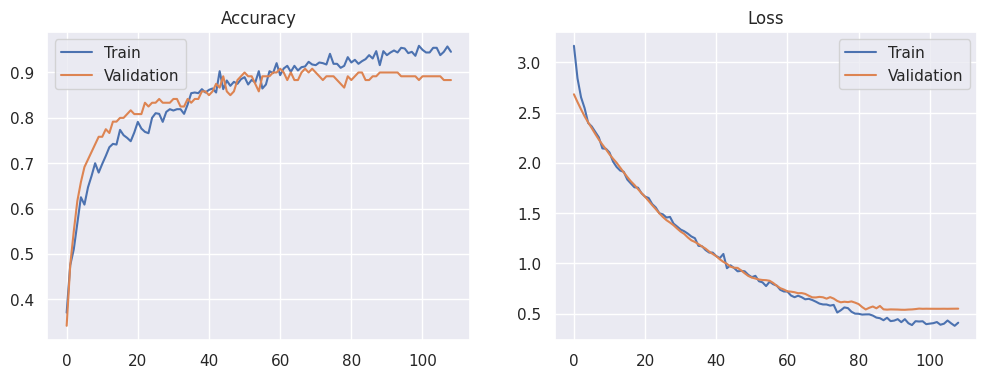

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Prétraitement ---
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# --- 2. Configuration de la validation croisée ---
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_scores = []

# --- 3. Validation croisée ---
for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y_train)):
    print(f"Fold {fold+1}/{n_splits}")

    # Séparation des données
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Création du modèle amélioré
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_scaled.shape[1],),
                    kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(len(np.unique(y_train)), activation='softmax')
    ])

    # Optimiseur avec learning rate adaptatif
    optimizer = Adam(learning_rate=0.001)

    # Compilation
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.00001
    )

    # Entraînement
    model.fit(
        X_train_fold, y_train_fold,
        epochs=200,
        batch_size=64,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )

    # Évaluation
    y_pred = np.argmax(model.predict(X_val_fold, verbose=0), axis=1)
    fold_accuracy = accuracy_score(y_val_fold, y_pred)
    cv_scores.append(fold_accuracy)
    print(f"Fold {fold+1} accuracy: {fold_accuracy:.4f}")
    print(classification_report(y_val_fold, y_pred))

# --- 4. Résultats ---
print("\nScores de validation croisée:", ', '.join([f'{score:.4f}' for score in cv_scores]))
print(f"Score moyen: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

# --- 5. Entraînement du modèle final ---
final_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_scaled.shape[1],),
                kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Optimiseur avec learning rate adaptatif
optimizer = Adam(learning_rate=0.001)

final_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Séparation d'une validation pour le modèle final
from sklearn.model_selection import train_test_split
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_scaled, y_train, test_size=0.15, stratify=y_train, random_state=42
)

# Entraînement du modèle final
history = final_model.fit(
    X_train_final, y_train_final,
    epochs=200,
    batch_size=64,
    validation_data=(X_val_final, y_val_final),
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

# Évaluation sur l'ensemble de test
if 'X_test' in globals() and 'y_test' in globals():
    X_test_scaled = scaler.transform(X_test)
    test_loss, test_acc = final_model.evaluate(X_test_scaled, y_test)
    print(f"\nPrécision sur l'ensemble de test: {test_acc:.4f}")

    # Prédictions et rapport de classification
    y_test_pred = np.argmax(final_model.predict(X_test_scaled), axis=1)
    print("\nRapport de classification sur l'ensemble de test:")
    print(classification_report(y_test, y_test_pred))

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()


## 5.Evaluation et discussion des performances

In [ ]:
# Importer les fonctions necessaires
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

### Comparaison des modeles SVM  (Support Vector Machine) / Classification Binaire

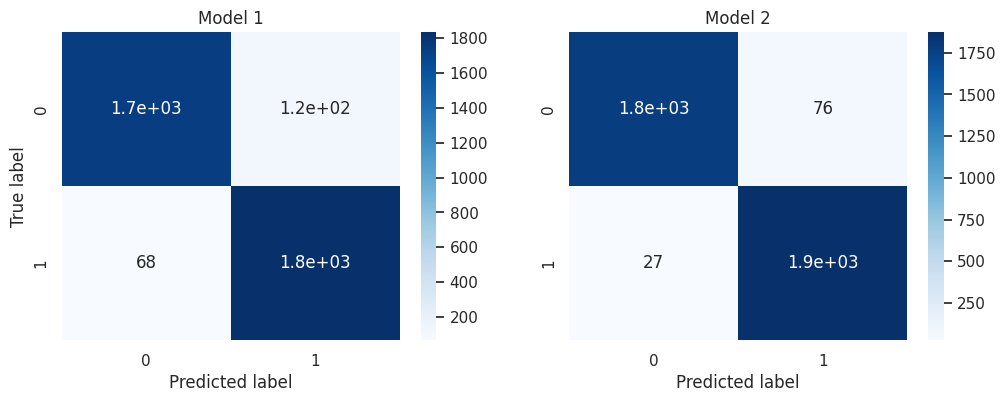

In [ ]:
y_pred_svm1 = svm1.predict(X_test_bc)
y_pred_svm2 = svm2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_svm1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

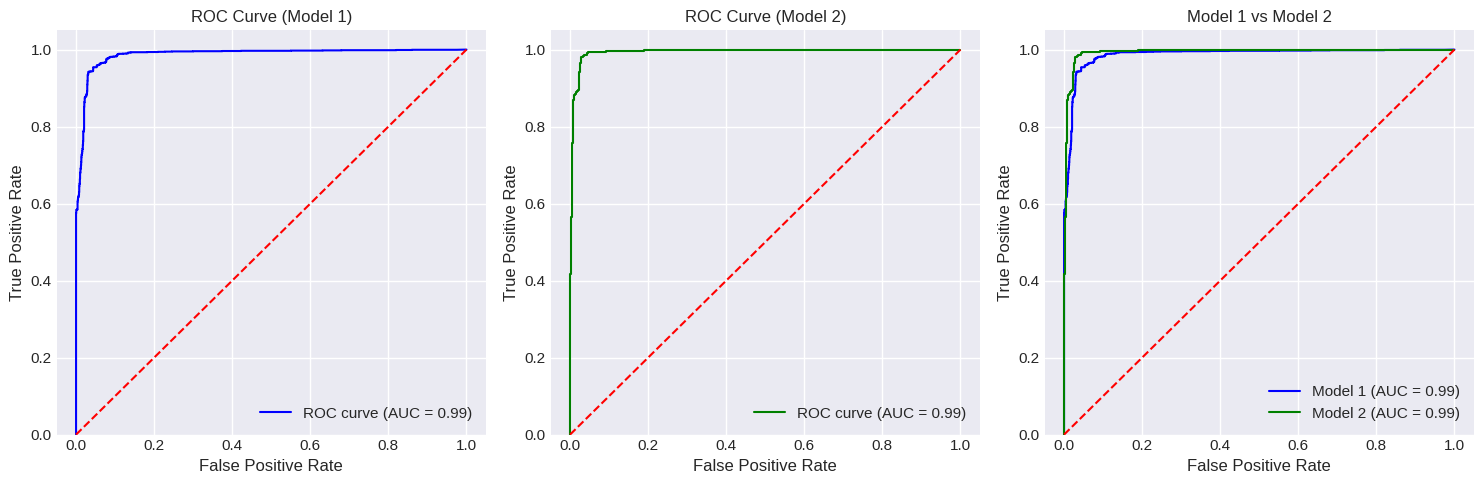

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcul des probabilités de prédiction pour chaque modèle
y_prob_svm1 = svm1.predict_proba(X_test_bc)[:, 1]
y_prob_svm2 = svm2.predict_proba(X_test_bc)[:, 1]

# Calcul des courbes ROC et des aires sous la courbe (AUC)
fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_svm1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

# Vérification que 'colors' est défini et contient au moins 3 couleurs
if 'colors' not in locals():
    colors = ['red', 'blue', 'green']  # Définition par défaut si non fourni

plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Courbe ROC pour le modèle 1
axes[0].plot(fpr1, tpr1, label=f'ROC curve (AUC = {roc_auc1:.2f})', color=colors[1])
axes[0].plot([0, 1], [0, 1], color=colors[0], linestyle='--')
axes[0].set_xlim([-0.05, 1.05])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc='lower right')

# Courbe ROC pour le modèle 2
axes[1].plot(fpr2, tpr2, label=f'ROC curve (AUC = {roc_auc2:.2f})', color=colors[2])
axes[1].plot([0, 1], [0, 1], color=colors[0], linestyle='--')
axes[1].set_xlim([-0.05, 1.05])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc='lower right')

# Comparaison des deux modèles
axes[2].plot(fpr1, tpr1, label=f'Model 1 (AUC = {roc_auc1:.2f})', color=colors[1])
axes[2].plot(fpr2, tpr2, label=f'Model 2 (AUC = {roc_auc2:.2f})', color=colors[2])
axes[2].plot([0, 1], [0, 1], color=colors[0], linestyle='--')
axes[2].set_xlim([-0.05, 1.05])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc='lower right')

plt.tight_layout()
plt.show()


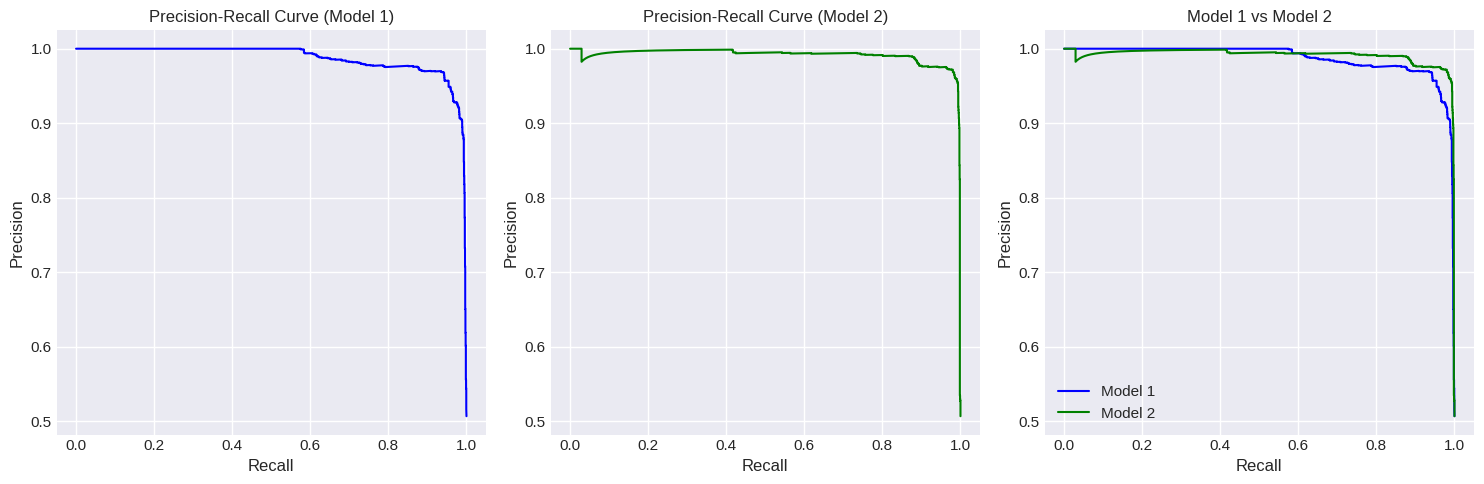

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_svm1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1])
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

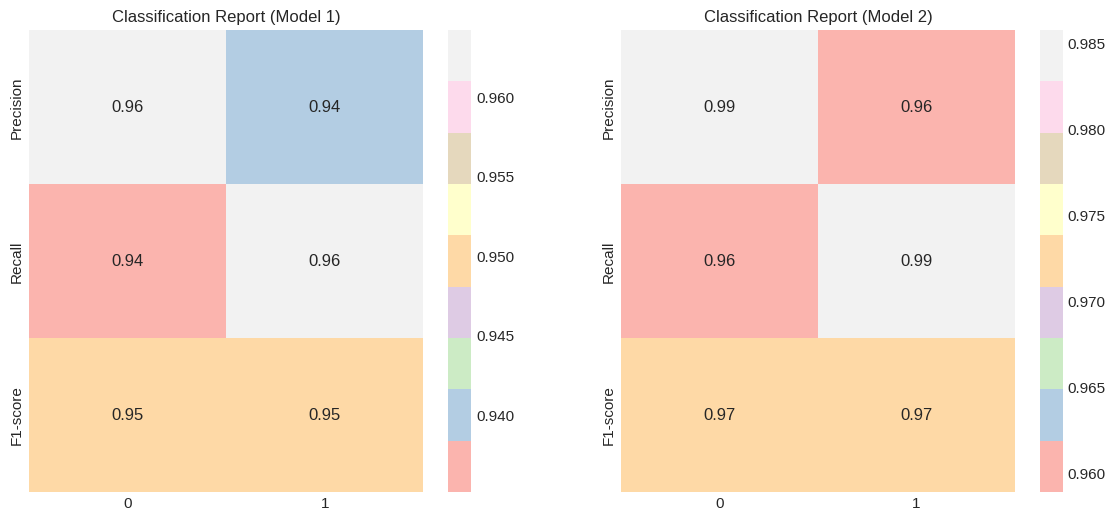

In [ ]:
target_names = svm1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

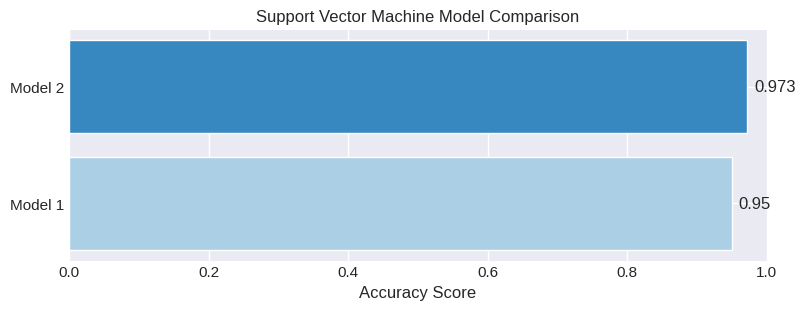

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_svm1, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

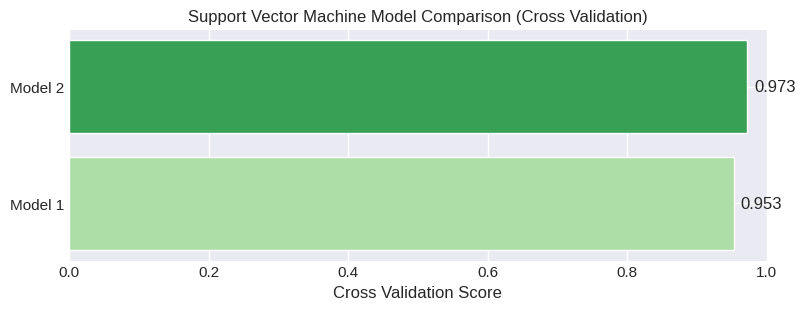

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_svm1.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Calcul de l'AUC pour l'entraînement et le test
auc_train_svm1 = roc_auc_score(y_train_bc, svm1.predict_proba(X_train_bc)[:, 1])
auc_test_svm1 = roc_auc_score(y_test_bc, svm1.predict_proba(X_test_bc)[:, 1])

auc_train_svm2 = roc_auc_score(y_train_bc, svm2.predict_proba(X_train_bc)[:, 1])
auc_test_svm2 = roc_auc_score(y_test_bc, svm2.predict_proba(X_test_bc)[:, 1])

# Affichage des résultats
print(f"Model 1 - AUC Train: {auc_train_svm1:.2f}, AUC Test: {auc_test_svm1:.2f}")
print(f"Model 2 - AUC Train: {auc_train_svm2:.2f}, AUC Test: {auc_test_svm2:.2f}")

# Vérification d'overfitting
def detect_overfitting(auc_train, auc_test, threshold=0.05):
    if auc_train - auc_test > threshold:
        return "Overfitting detected!"
    return "No overfitting."

print(f"Model 1: {detect_overfitting(auc_train_svm1, auc_test_svm1)}")
print(f"Model 2: {detect_overfitting(auc_train_svm2, auc_test_svm2)}")


Model 1 - AUC Train: 0.99, AUC Test: 0.99
Model 2 - AUC Train: 1.00, AUC Test: 0.99
Model 1: No overfitting.
Model 2: No overfitting.


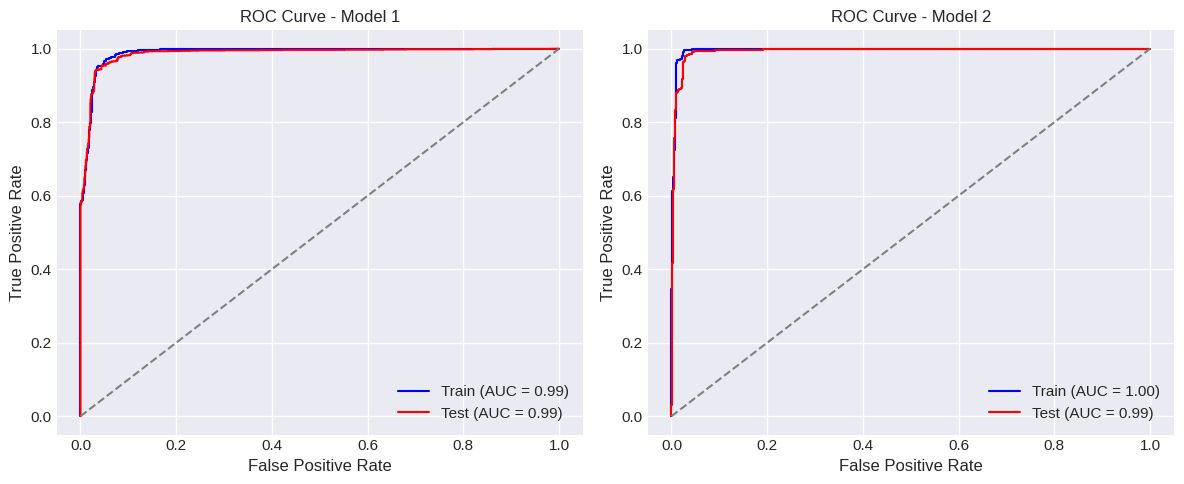

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Courbe ROC pour l'entraînement et le test (Modèle 1)
y_prob_train_svm1 = svm1.predict_proba(X_train_bc)[:, 1]
y_prob_test_svm1 = svm1.predict_proba(X_test_bc)[:, 1]

fpr1_train, tpr1_train, _ = roc_curve(y_train_bc, y_prob_train_svm1)
fpr1_test, tpr1_test, _ = roc_curve(y_test_bc, y_prob_test_svm1)

roc_auc1_train = auc(fpr1_train, tpr1_train)
roc_auc1_test = auc(fpr1_test, tpr1_test)

# Courbe ROC pour l'entraînement et le test (Modèle 2)
y_prob_train_svm2 = svm2.predict_proba(X_train_bc)[:, 1]
y_prob_test_svm2 = svm2.predict_proba(X_test_bc)[:, 1]

fpr2_train, tpr2_train, _ = roc_curve(y_train_bc, y_prob_train_svm2)
fpr2_test, tpr2_test, _ = roc_curve(y_test_bc, y_prob_test_svm2)

roc_auc2_train = auc(fpr2_train, tpr2_train)
roc_auc2_test = auc(fpr2_test, tpr2_test)

# Création des graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Modèle 1
axes[0].plot(fpr1_train, tpr1_train, label=f'Train (AUC = {roc_auc1_train:.2f})', color='blue')
axes[0].plot(fpr1_test, tpr1_test, label=f'Test (AUC = {roc_auc1_test:.2f})', color='red')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Model 1')
axes[0].legend(loc='lower right')

# Modèle 2
axes[1].plot(fpr2_train, tpr2_train, label=f'Train (AUC = {roc_auc2_train:.2f})', color='blue')
axes[1].plot(fpr2_test, tpr2_test, label=f'Test (AUC = {roc_auc2_test:.2f})', color='red')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - Model 2')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


### Comparaison des modeles SVM (Support Vector Machine) / Mutli  Classification

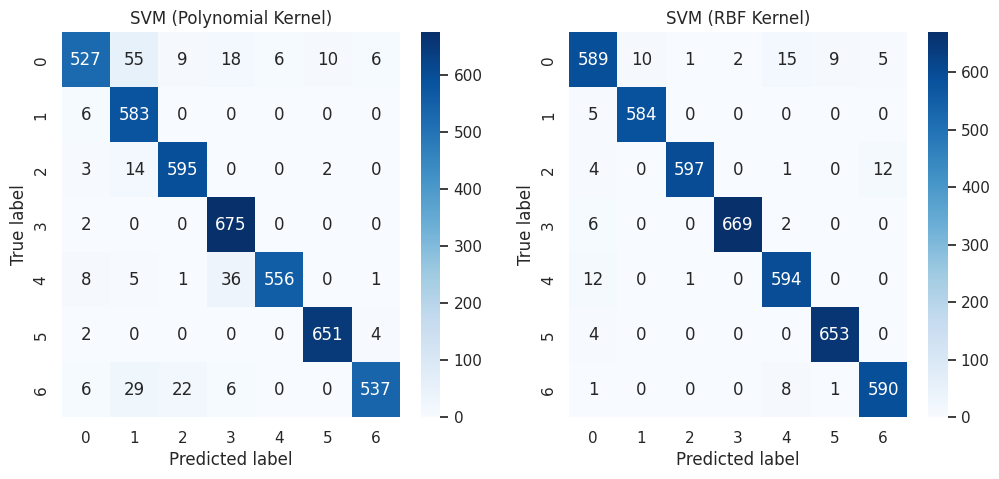

In [ ]:
y_pred_svm11 = svm11.predict(X_test)
y_pred_svm12 = svm12.predict(X_test)

# Matrices de confusion
conf_matrix_svm11 = confusion_matrix(y_test_encoded, y_pred_svm11)
conf_matrix_svm12 = confusion_matrix(y_test_encoded, y_pred_svm12)

# Création de la figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Matrice de confusion pour le modèle SVM avec noyau polynomial
sns.heatmap(conf_matrix_svm11, annot=True, cmap='Blues', fmt='d', ax=axs[0])
axs[0].set_title('SVM (Polynomial Kernel)')
axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')

# Matrice de confusion pour le modèle SVM avec noyau RBF
sns.heatmap(conf_matrix_svm12, annot=True, cmap='Blues', fmt='d', ax=axs[1])
axs[1].set_title('SVM (RBF Kernel)')
axs[1].set_xlabel('Predicted label')
axs[1].set_ylabel('True label')

# Affichage de la figure
plt.show()

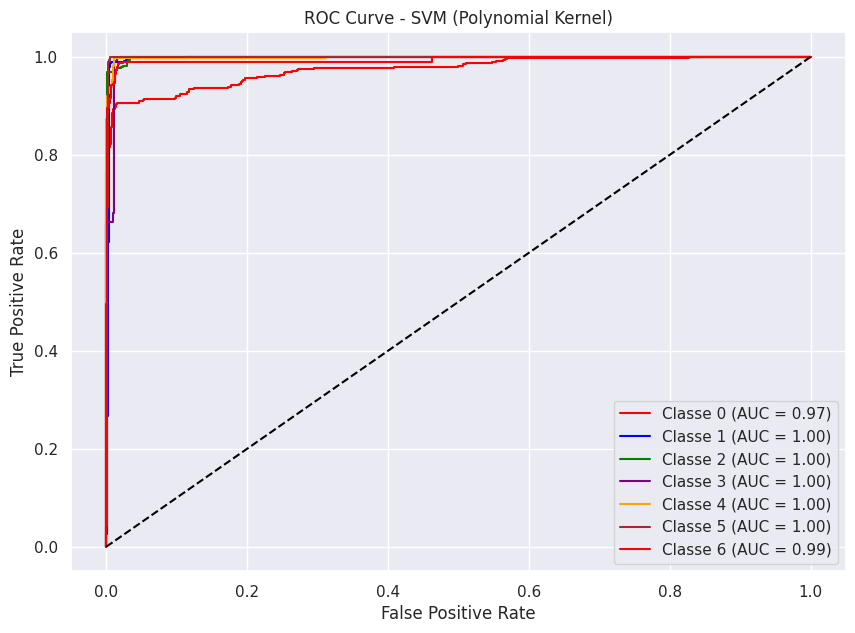

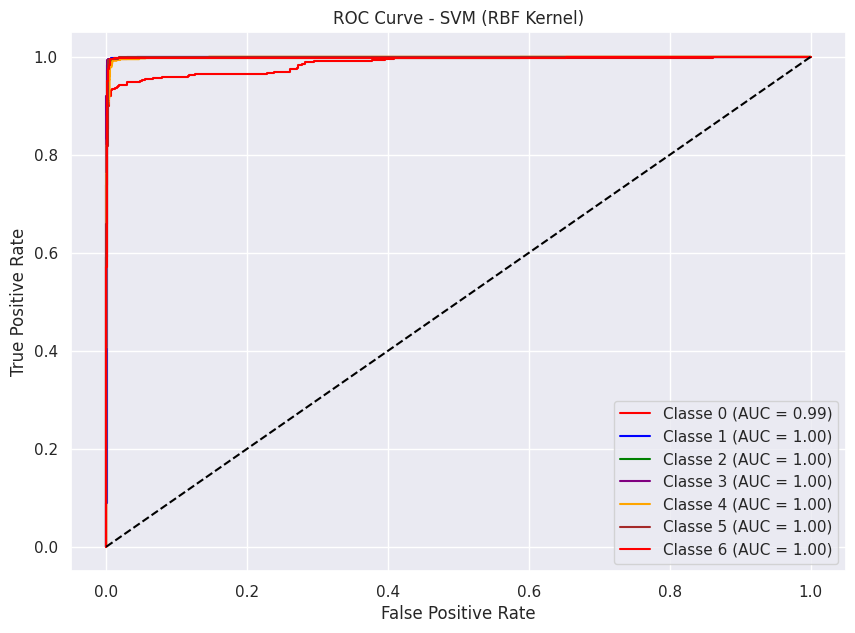

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarisation des labels pour le calcul des courbes ROC
n_classes = len(np.unique(y_test_encoded))
y_test_bin = label_binarize(y_test_encoded, classes=np.arange(n_classes))

# Calcul des probabilités de prédiction pour chaque modèle
y_prob_svm11 = svm11.predict_proba(X_test)
y_prob_svm12 = svm12.predict_proba(X_test)

# Définition des couleurs pour les courbes
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

# Création de la figure pour SVM (Polynomial Kernel)
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_svm11[:, i])
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {auc(fpr, tpr):.2f})', color=colors[i % len(colors)])

plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Polynomial Kernel)')
plt.legend(loc="lower right")
plt.show()

# Création de la figure pour SVM (RBF Kernel)
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_svm12[:, i])
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {auc(fpr, tpr):.2f})', color=colors[i % len(colors)])

plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (RBF Kernel)')
plt.legend(loc="lower right")
plt.show()


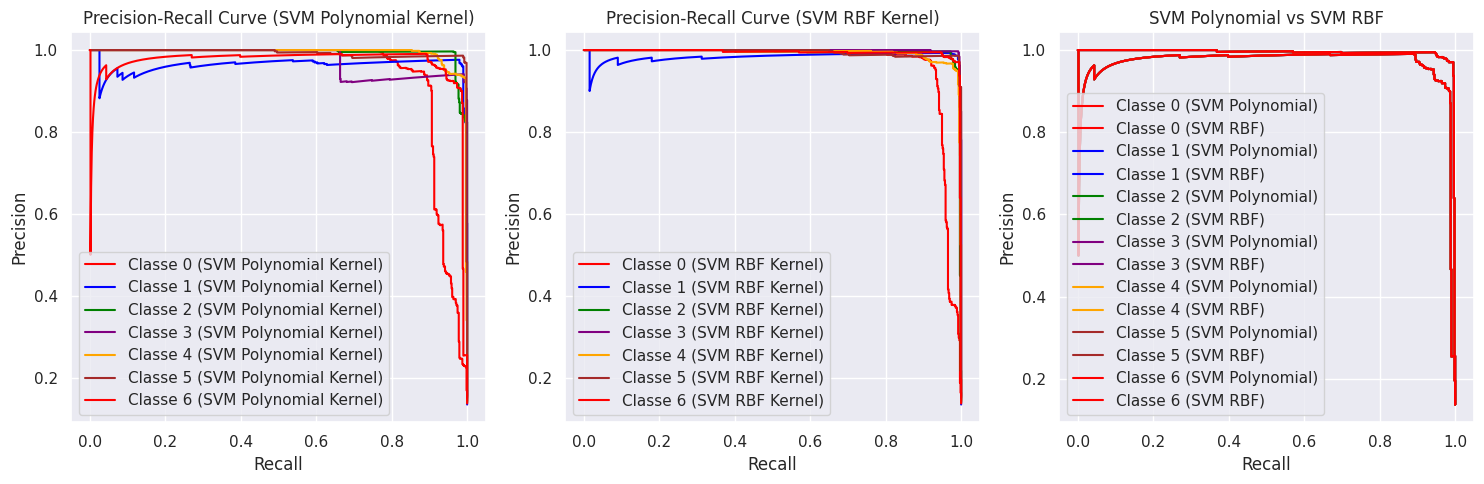

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarisation des labels pour la courbe Precision-Recall
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
n_classes = y_test_bin.shape[1]

# Calcul des probabilités de prédiction pour chaque modèle
y_prob_svm11 = svm11.predict_proba(X_test)
y_prob_svm12 = svm12.predict_proba(X_test)

# Définition des couleurs pour les courbes
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

# Création de la figure pour Precision-Recall
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pour chaque classe, calcul de la courbe Precision-Recall
for i in range(n_classes):
    precision1, recall1, _ = precision_recall_curve(y_test_bin[:, i], y_prob_svm11[:, i])
    precision2, recall2, _ = precision_recall_curve(y_test_bin[:, i], y_prob_svm12[:, i])

    axs[0].plot(recall1, precision1, color=colors[i % len(colors)], label=f'Classe {i} (SVM Polynomial Kernel)')
    axs[1].plot(recall2, precision2, color=colors[i % len(colors)], label=f'Classe {i} (SVM RBF Kernel)')

# Paramètres pour chaque graphique
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (SVM Polynomial Kernel)')
axs[0].legend(loc='lower left')

axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (SVM RBF Kernel)')
axs[1].legend(loc='lower left')

# Comparaison des modèles (les courbes de toutes les classes sur un seul graphique)
for i in range(n_classes):
    axs[2].plot(recall1, precision1, color=colors[i % len(colors)], label=f'Classe {i} (SVM Polynomial)')
    axs[2].plot(recall2, precision2, color=colors[i % len(colors)], label=f'Classe {i} (SVM RBF)')

axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('SVM Polynomial vs SVM RBF')
axs[2].legend(loc='lower left')

# Ajustement du layout
plt.tight_layout()
plt.show()


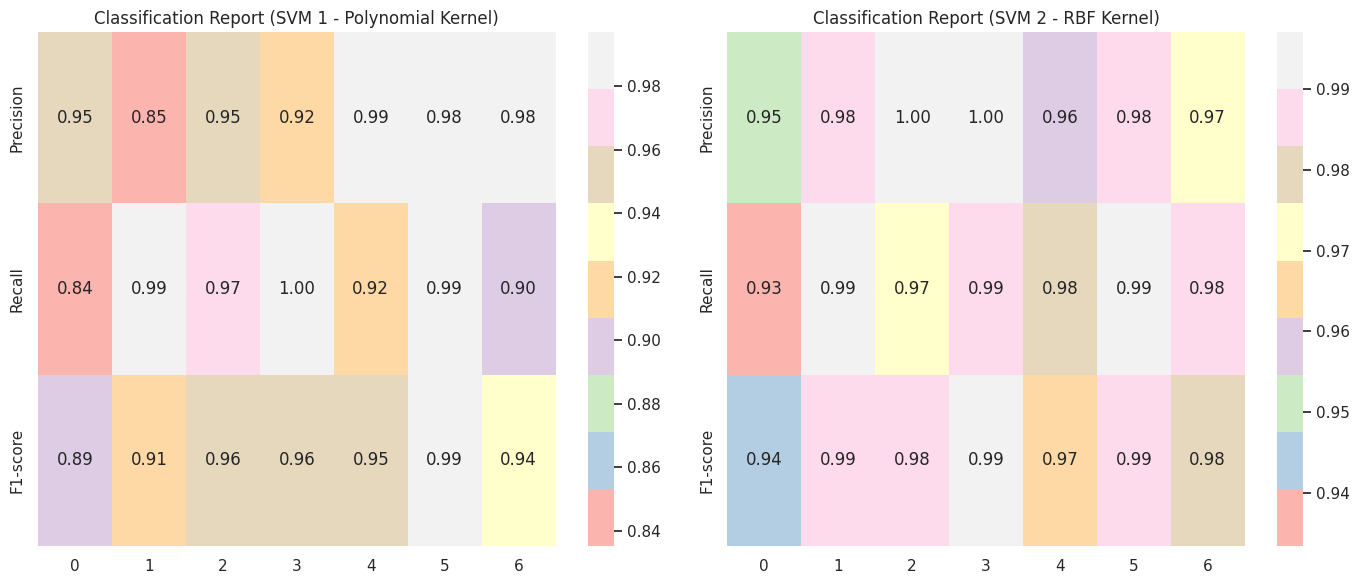

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Génération des rapports de classification pour les deux modèles
target_names = svm11.classes_

# Rapport de classification pour le modèle SVM 1 (polynomial kernel)
metrics1 = classification_report(y_true = y_test_encoded, y_pred = y_pred_svm11, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

# Rapport de classification pour le modèle SVM 2 (RBF kernel)
metrics2 = classification_report(y_true = y_test_encoded, y_pred = y_pred_svm12, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

# Préparation des données pour la heatmap
data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])

# Définition des lignes (precision, recall, f1-score)
rows = ['Precision', 'Recall', 'F1-score']

# Création de la figure pour les heatmaps
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap pour le premier modèle (SVM 1 - Polynomial Kernel)
sns.heatmap(data1, cmap='Pastel1', annot=True, fmt='.2f', xticklabels=target_names, yticklabels=rows, ax=axs[0])
axs[0].set_title('Classification Report (SVM 1 - Polynomial Kernel)')

# Heatmap pour le second modèle (SVM 2 - RBF Kernel)
sns.heatmap(data2, cmap='Pastel1', annot=True, fmt='.2f', xticklabels=target_names, yticklabels=rows, ax=axs[1])
axs[1].set_title('Classification Report (SVM 2 - RBF Kernel)')

# Affichage des graphiques
plt.tight_layout()
plt.show()


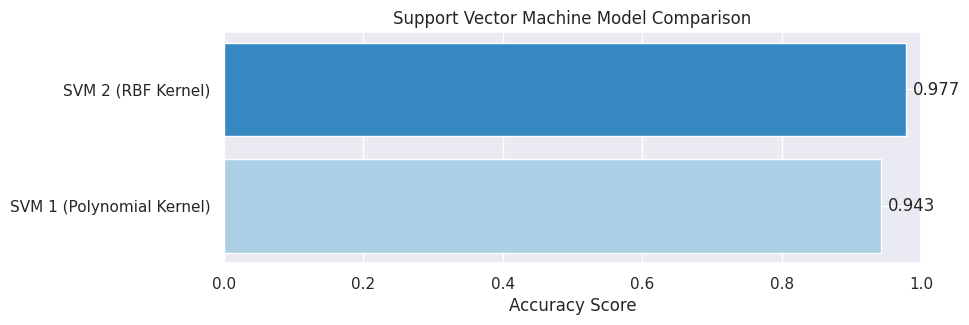

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calcul des scores de précision pour les modèles svm11 et svm12
acc1 = accuracy_score(y_pred_svm11, y_test_encoded)
acc2 = accuracy_score(y_pred_svm12, y_test_encoded)

# Définir les étiquettes et les scores
labels = ['SVM 1 (Polynomial Kernel)', 'SVM 2 (RBF Kernel)']
scores = [acc1, acc2]

# Choix de la palette de couleurs
palette = sns.color_palette('Blues', n_colors=2)

# Création du graphique
fig, ax = plt.subplots(figsize=(9, 3))
ax.barh(labels, scores, color=palette)
ax.set_xlim([0, 1])  # Limite de l'axe x de 0 à 1
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

# Affichage des scores à côté des barres
for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha='left', va='center')

# Affichage du graphique
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Calcul de l'AUC pour l'entraînement et le test pour svm11 et svm12 (en mode multiclasses)
auc_train_svm11 = roc_auc_score(y_train_encoded, svm11.predict_proba(X_train), multi_class='ovr')
auc_test_svm11 = roc_auc_score(y_test_encoded, svm11.predict_proba(X_test), multi_class='ovr')

auc_train_svm12 = roc_auc_score(y_train_encoded, svm12.predict_proba(X_train), multi_class='ovr')
auc_test_svm12 = roc_auc_score(y_test_encoded, svm12.predict_proba(X_test), multi_class='ovr')

# Affichage des résultats
print(f"SVM 1 (Polynomial Kernel) - AUC Train: {auc_train_svm11:.2f}, AUC Test: {auc_test_svm11:.2f}")
print(f"SVM 2 (RBF Kernel) - AUC Train: {auc_train_svm12:.2f}, AUC Test: {auc_test_svm12:.2f}")

# Vérification d'overfitting
def detect_overfitting(auc_train, auc_test, threshold=0.05):
    if auc_train - auc_test > threshold:
        return "Overfitting detected!"
    return "No overfitting."

# Vérification de l'overfitting pour chaque modèle
print(f"SVM 1 (Polynomial Kernel): {detect_overfitting(auc_train_svm11, auc_test_svm11)}")
print(f"SVM 2 (RBF Kernel): {detect_overfitting(auc_train_svm12, auc_test_svm12)}")


SVM 1 (Polynomial Kernel) - AUC Train: 0.99, AUC Test: 0.99
SVM 2 (RBF Kernel) - AUC Train: 1.00, AUC Test: 1.00
SVM 1 (Polynomial Kernel): No overfitting.
SVM 2 (RBF Kernel): No overfitting.


### Comparison des Models  Decision Trees

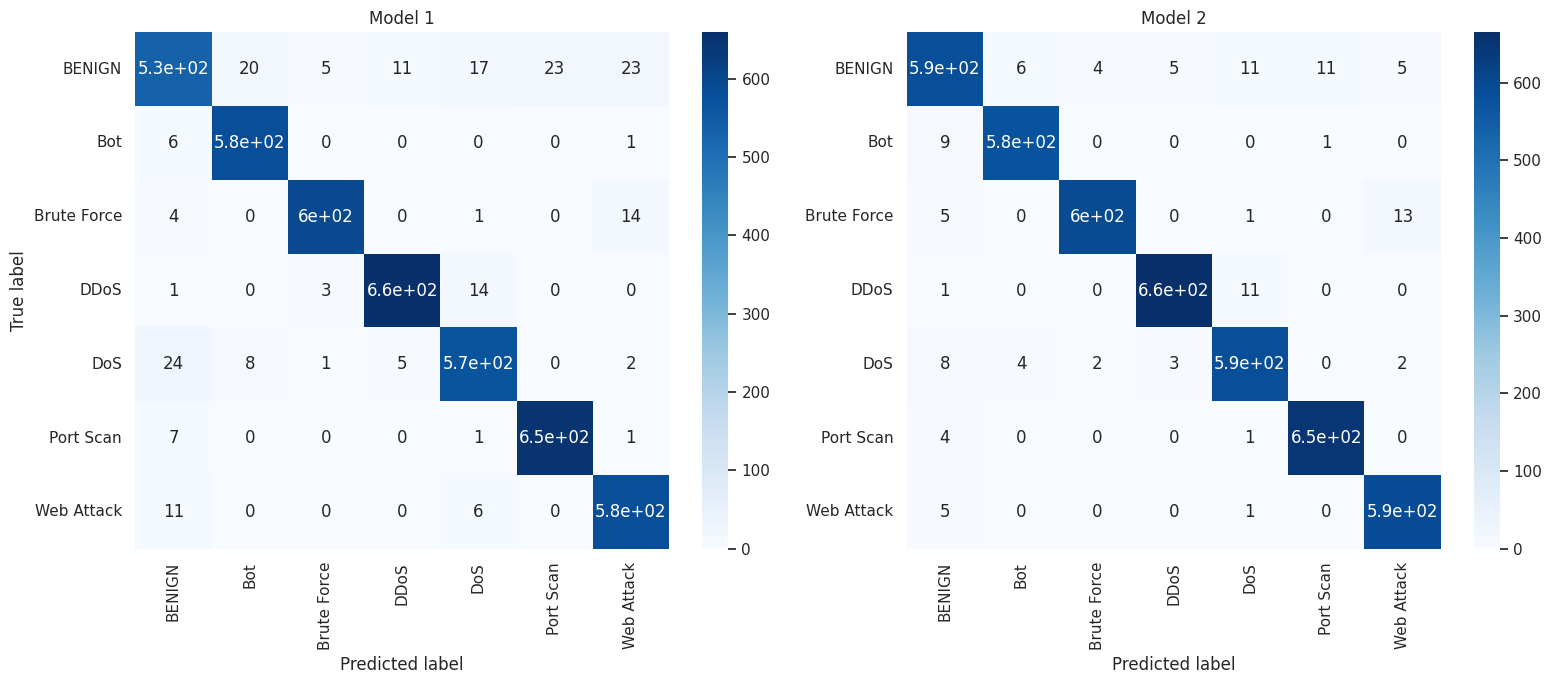

In [ ]:
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_dt1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_dt2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt2.classes_, yticklabels = dt2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

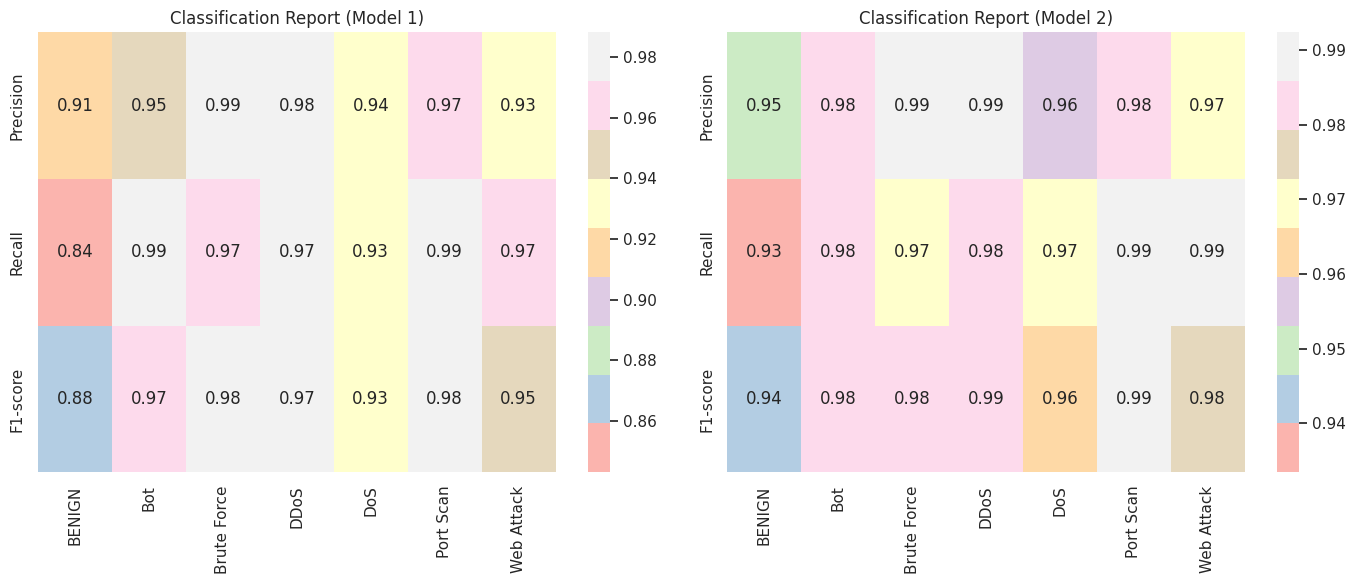

In [ ]:
target_names = dt1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_dt1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_dt2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

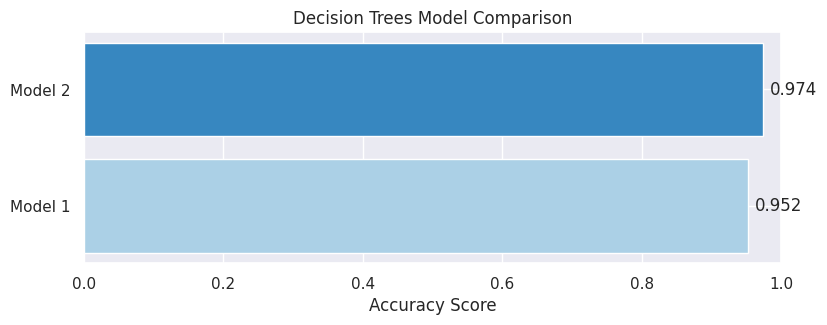

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_dt1, y_test)
acc2 = accuracy_score(y_pred_dt2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Decision Trees Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

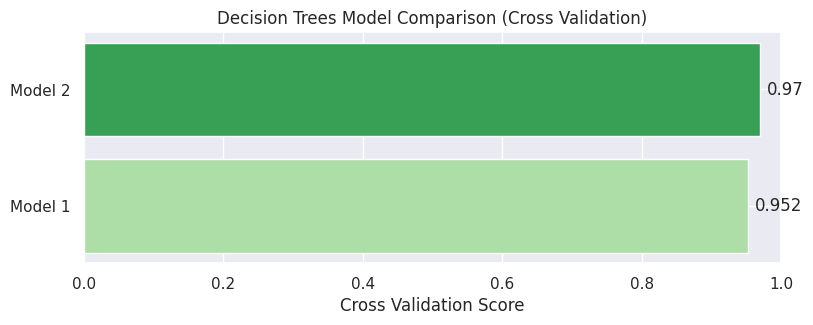

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_dt1.mean(), cv_dt2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Comparison des Models Random Forest

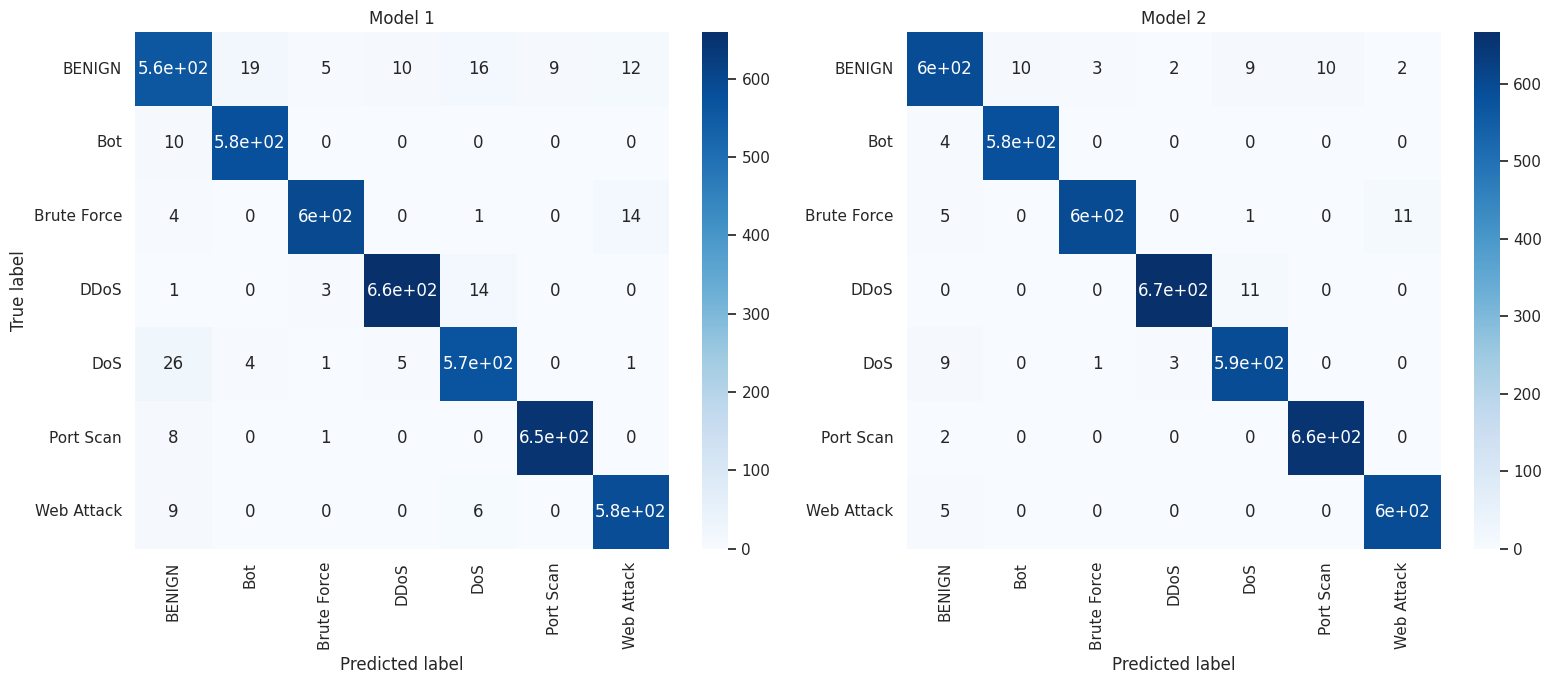

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_rf2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf1.classes_, yticklabels = rf1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = rf2.classes_, yticklabels = rf2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

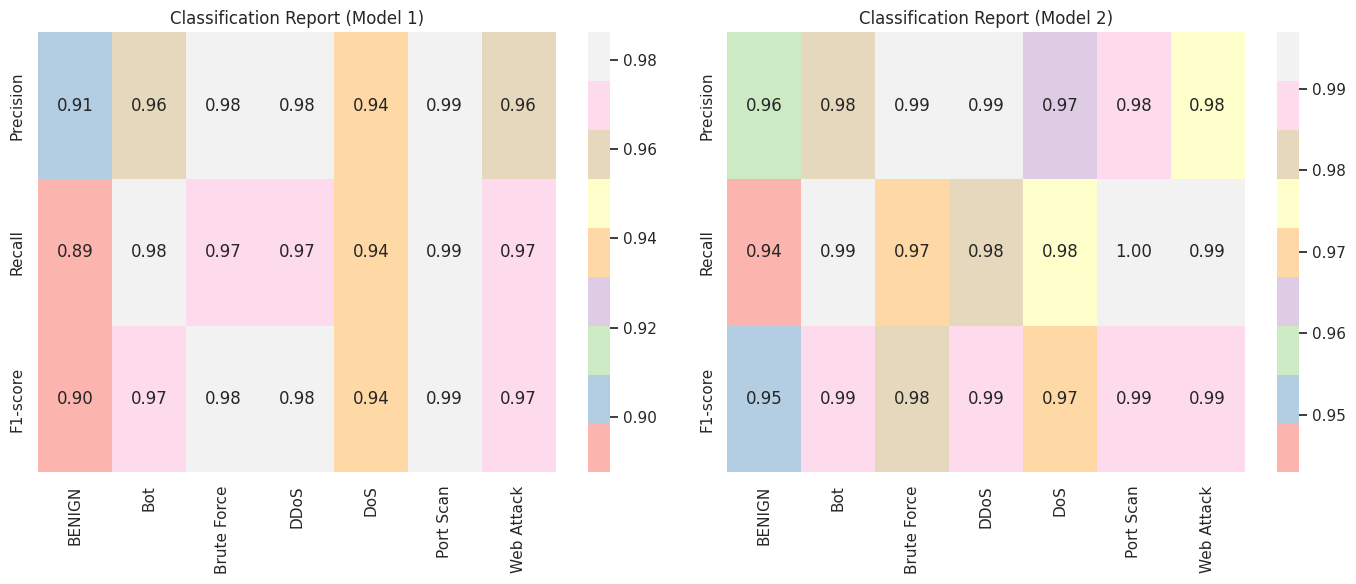

In [ ]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

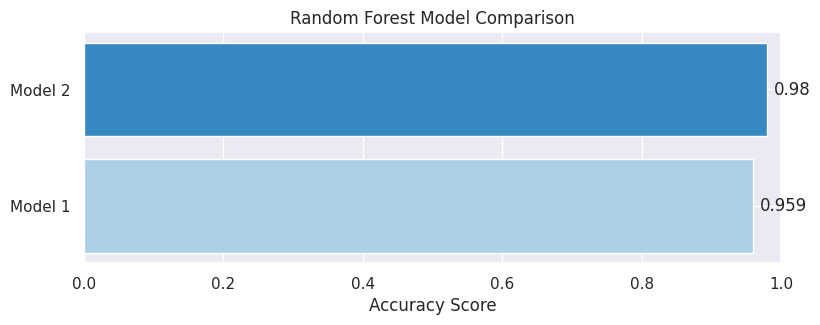

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_rf1, y_test)
acc2 = accuracy_score(y_pred_rf2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Random Forest Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

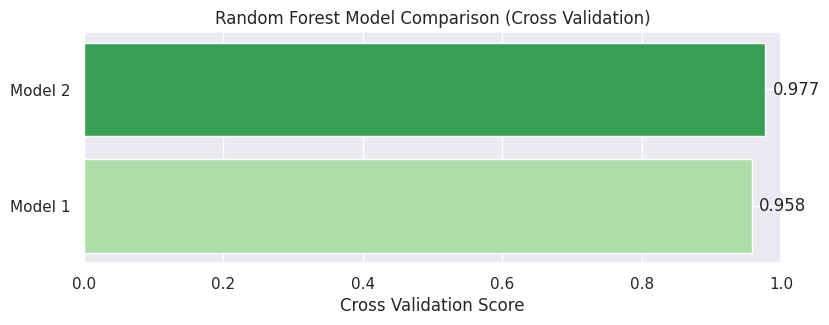

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_rf1.mean(), cv_rf2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Random Forest Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

###   Comparison des Modeles  de K Nearest Neighbours


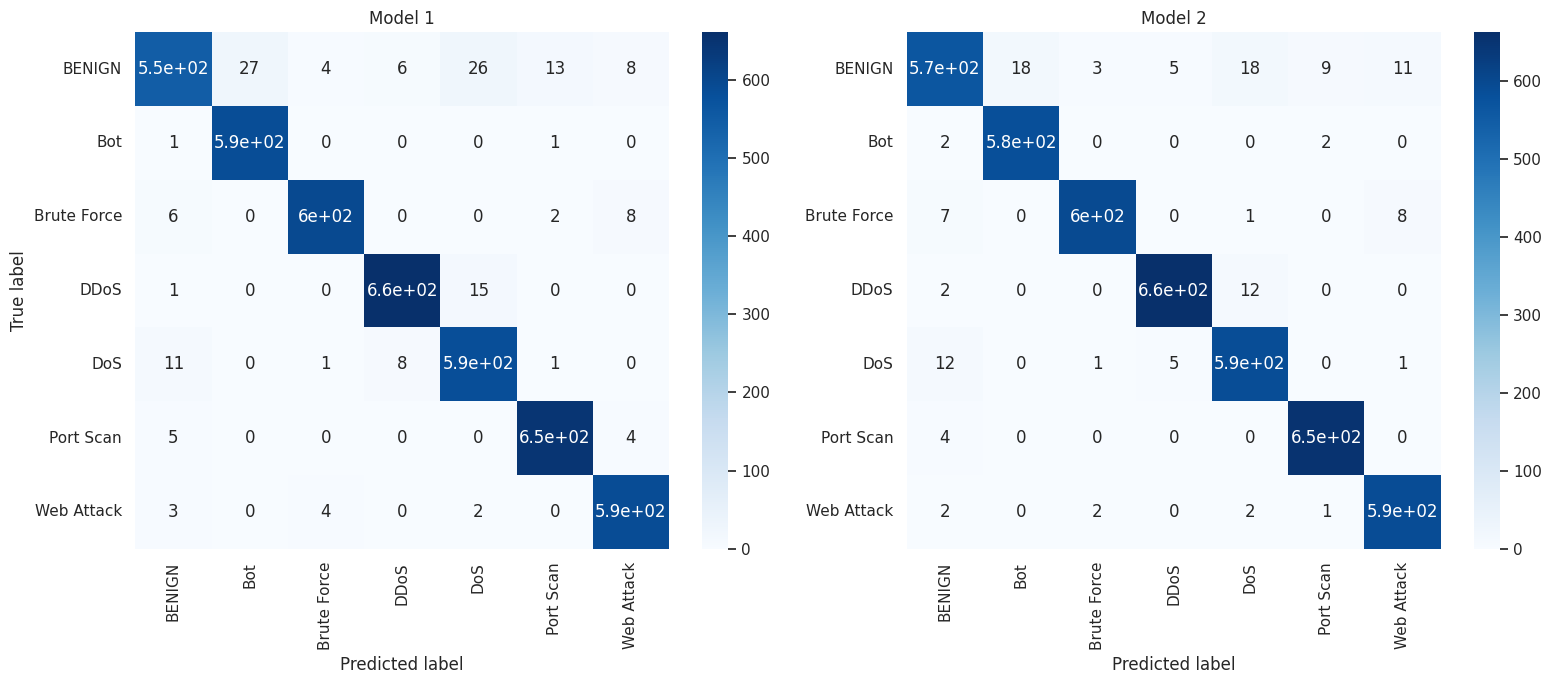

In [ ]:
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_knn1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_knn2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = knn1.classes_, yticklabels = knn1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = knn2.classes_, yticklabels = knn2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

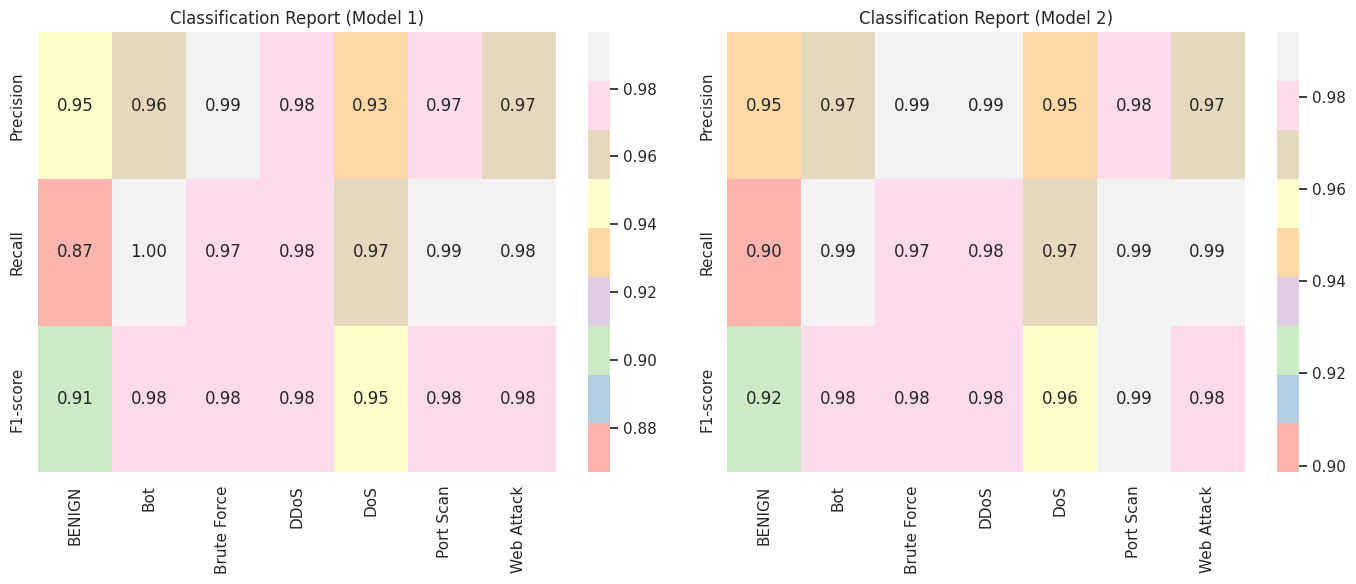

In [ ]:
target_names = knn1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_knn1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_knn2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

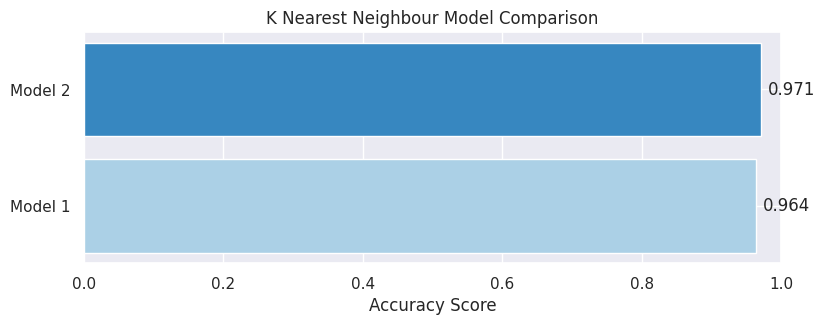

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_knn1, y_test)
acc2 = accuracy_score(y_pred_knn2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('K Nearest Neighbour Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

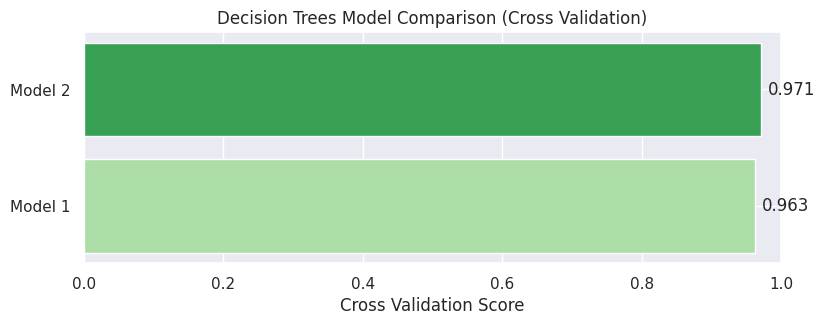

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_knn1.mean(), cv_knn2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

###   Comparison des Modeles  de l'ensemble learning (LigntGBM && XGBoost)

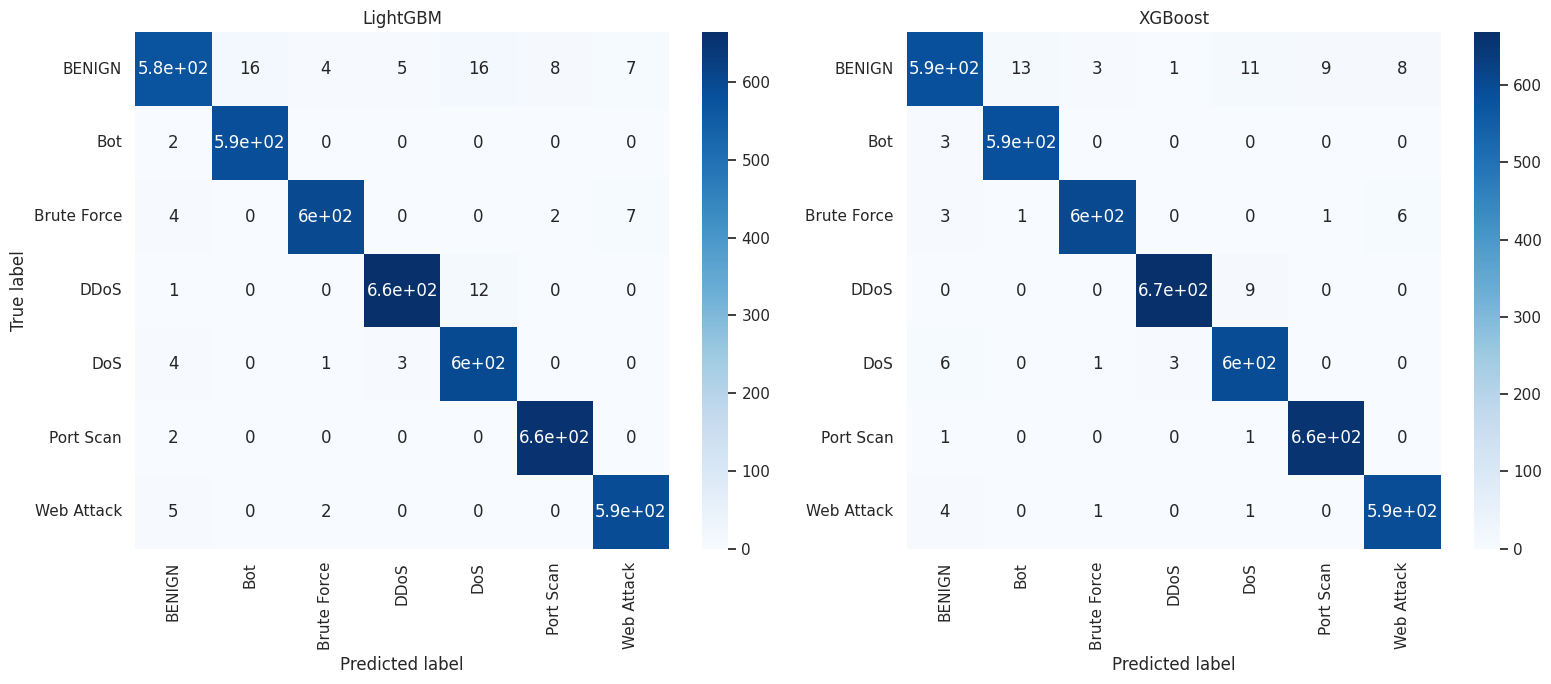

In [ ]:
y_pred_lgbm = lgbm1.predict(X_test)
y_pred_xgb = label_encoder.inverse_transform(xgb1.predict(X_test))

conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_lgbm, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = lgbm1.classes_, yticklabels = lgbm1.classes_)
axs[0].set_title('LightGBM')

sns.heatmap(conf_matrix_xgb, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = label_encoder.classes_, yticklabels = label_encoder.classes_)
axs[1].set_title('XGBoost')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

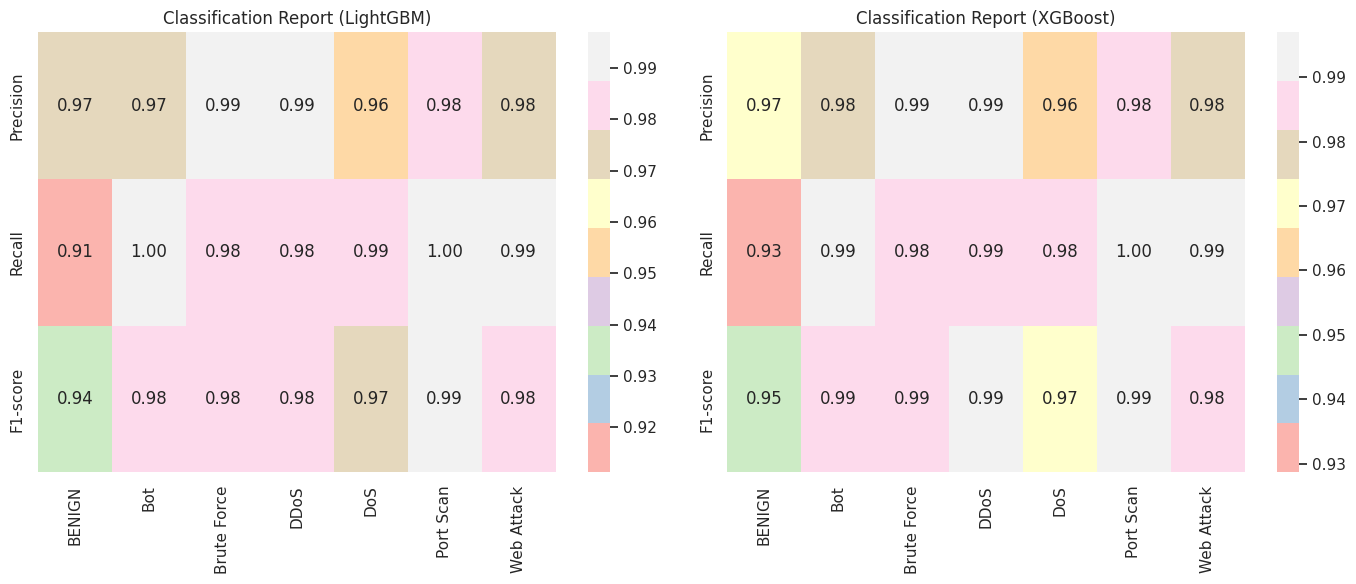

In [ ]:

target_names = lgbm1.classes_
metrics_lgbm = classification_report(y_true=y_test, y_pred=y_pred_lgbm,
                                     target_names=target_names, output_dict=True)
precision_lgbm = [metrics_lgbm[target_name]['precision'] for target_name in target_names]
recall_lgbm = [metrics_lgbm[target_name]['recall'] for target_name in target_names]
f1_score_lgbm = [metrics_lgbm[target_name]['f1-score'] for target_name in target_names]

metrics_xgb = classification_report(y_true=y_test, y_pred=y_pred_xgb,
                                   target_names=target_names, output_dict=True)
precision_xgb = [metrics_xgb[target_name]['precision'] for target_name in target_names]
recall_xgb = [metrics_xgb[target_name]['recall'] for target_name in target_names]
f1_score_xgb = [metrics_xgb[target_name]['f1-score'] for target_name in target_names]


data_lgbm = np.array([precision_lgbm, recall_lgbm, f1_score_lgbm])
data_xgb = np.array([precision_xgb, recall_xgb, f1_score_xgb])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(data_lgbm, cmap='Pastel1', annot=True, fmt='.2f',
            xticklabels=target_names, yticklabels=rows, ax=axs[0])
sns.heatmap(data_xgb, cmap='Pastel1', annot=True, fmt='.2f',
            xticklabels=target_names, yticklabels=rows, ax=axs[1])
axs[0].set_title('Classification Report (LightGBM)')
axs[1].set_title('Classification Report (XGBoost)')
fig.tight_layout()
plt.show()

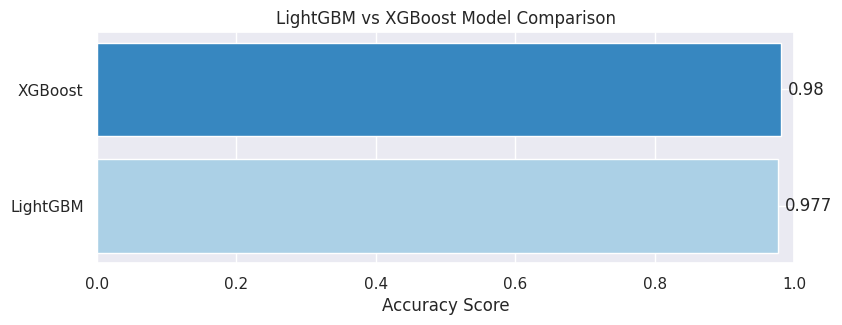

In [ ]:

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

palette = sns.color_palette('Blues', n_colors=2)
labels = ['LightGBM', 'XGBoost']
scores = [acc_lgbm, acc_xgb]

fig, ax = plt.subplots(figsize=(9, 3))
ax.barh(labels, scores, color=palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('LightGBM vs XGBoost Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha='left', va='center')

plt.show()

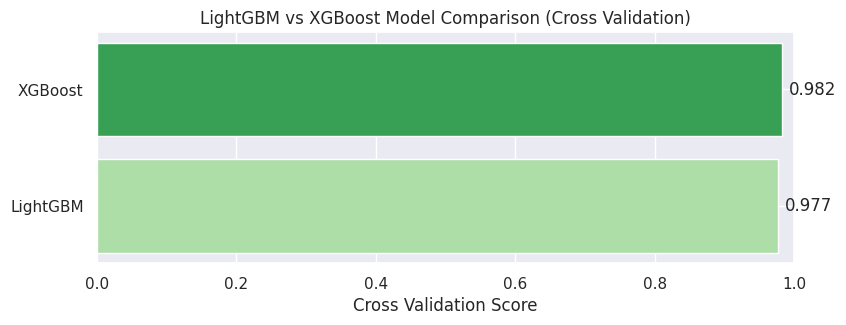

In [ ]:
palette = sns.color_palette('Greens', n_colors=2)
labels = ['LightGBM', 'XGBoost']
scores = [cv_lgbm1.mean(), cv_xgb1.mean()]

fig, ax = plt.subplots(figsize=(9, 3))
ax.barh(labels, scores, color=palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('LightGBM vs XGBoost Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha='left', va='center')

plt.show()

## 7.Comparaisons Finales des Modeles et la decision finale

- Dans cette section, nous allons procéder à une comparaison des performances des modèles entraînés à l’aide de différents algorithmes d’apprentissage automatique. Les algorithmes considérés sont :
 - **Random Forest (Modèle 2)**
 - **Decision Trees (Modèle 2)**
 - **SVM multi_classification (Modèle 2)**
 - **K-Nearest Neighbors (Modèle 2)**
 - **LightGBM**
 - **XGBoost**
 - **Artificial Neural Network (Deep Learning)**

- Cette comparaison nous permettra d’évaluer l’efficacité de chaque algorithme en termes de précision, robustesse et capacité de généralisation, afin d’identifier celui qui offre les meilleurs résultats pour notre jeu de données.

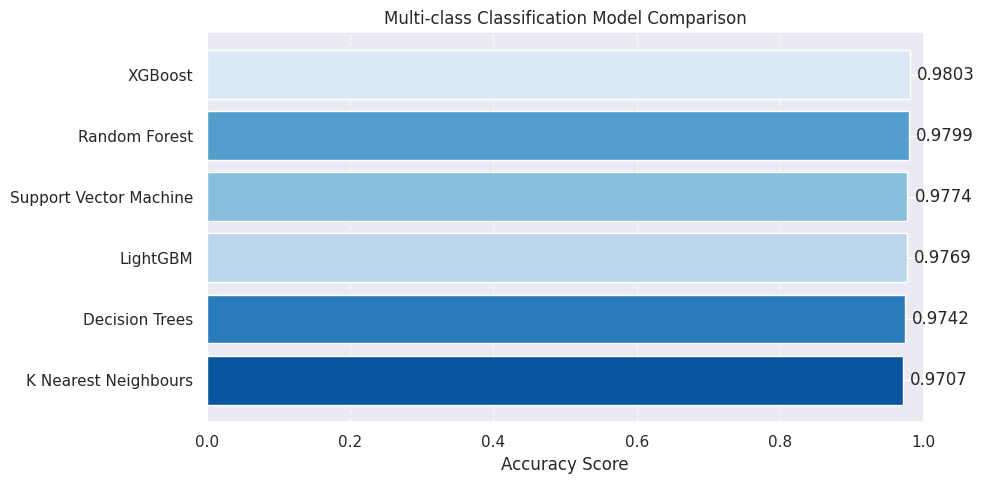

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Calcul des scores d'exactitude
svm_acc = accuracy_score(y_pred_svm12, y_test_encoded)
rf_acc = accuracy_score(y_pred_rf2, y_test)
dt_acc = accuracy_score(y_pred_dt2, y_test)
knn_acc = accuracy_score(y_pred_knn2, y_test)
lgbm_acc= accuracy_score(y_pred_lgbm, y_test)
xgb_acc= accuracy_score(y_pred_xgb, y_test)
# Création des labels et scores
labels = ['XGBoost','LightGBM','Support Vector Machine', 'Random Forest', 'Decision Trees', 'K Nearest Neighbours']
scores = [xgb_acc,lgbm_acc,svm_acc, rf_acc, dt_acc, knn_acc]

# Création de la palette de couleurs
# Le nombre de couleurs doit correspondre au nombre d'éléments (4 modèles)
palette = sns.color_palette('Blues', n_colors=6)

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 5))  # Augmentation de la hauteur pour plus de lisibilité

# Tri des modèles par score pour une meilleure visualisation
sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i])
sorted_labels = [labels[i] for i in sorted_indices]
sorted_scores = [scores[i] for i in sorted_indices]
sorted_palette = [palette[i] for i in sorted_indices]

# Création du graphique à barres horizontales
ax.barh(sorted_labels, sorted_scores, color=sorted_palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Multi-class Classification Model Comparison')

# Ajout des valeurs de score à côté des barres
for i, v in enumerate(sorted_scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha='left', va='center')

# Ajout d'une grille pour une meilleure lisibilité
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 8.OneClassSVM